# Credit Card Users Churn Prediction

## Background and Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

You need to identify the best possible model that will give the required performance

## Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

## Data Dictionary:

- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent.

# NECESSARY CODING

### 1.0 Import necessary libraries

In [518]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd


# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)


# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### 1.1 Load the dataset
The dataset containing Customers details is contained in the file titled "BankChurners.csv" in my particular directory.

In [519]:
my_dataset = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [602]:
# copying data to another varaible to avoid any changes to original data
data = my_dataset.copy()

<IPython.core.display.Javascript object>

### 1.2 Check out the shape of the dataset

In [521]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

The dataset contains 10127 rows and 21 columns.


<IPython.core.display.Javascript object>

In [604]:
data.drop(["CLIENTNUM"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

# There are 3 steps in Data Preprocessing:

# STEP A :Data format checking:
- Data Dimensioning
- checking the Data types

### 1.3A Checking the length of the dataset ()

In [523]:
len(data)

10127

<IPython.core.display.Javascript object>

### 1.4A To view first 5 rows of the dataset

In [524]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


<IPython.core.display.Javascript object>

### 1.5A To view the last 5 rows of the dataset

In [525]:
data.tail()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


<IPython.core.display.Javascript object>

### 1.6A To view 10 samples of the dataset

In [526]:
# let's view a sample of the data
data.sample(
    10, random_state=2
)  # setting the random_state will ensure we get the same results every time

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7862,Existing Customer,42,M,5,High School,Married,$60K - $80K,Blue,32,1,2,2,4162.000,1641,2521.000,0.719,3967,75,0.923,0.394
3536,Existing Customer,63,M,1,High School,Single,Less than $40K,Blue,51,5,3,2,6102.000,0,6102.000,0.639,4527,67,0.558,0.000
9770,Existing Customer,46,M,4,High School,Divorced,$120K +,Blue,31,2,3,1,3569.000,1553,2016.000,0.798,16695,116,0.681,0.435
8909,Existing Customer,41,M,4,Post-Graduate,Married,$80K - $120K,Blue,36,1,2,2,21751.000,1573,20178.000,0.878,8332,102,0.569,0.072
709,Existing Customer,40,M,5,Graduate,NaN,$40K - $60K,Blue,25,6,2,3,7860.000,541,7319.000,0.764,1367,35,0.750,0.069
975,Existing Customer,59,M,1,Post-Graduate,Married,$40K - $60K,Blue,36,4,2,2,2483.000,1372,1111.000,1.642,1704,35,0.458,0.553
32,Existing Customer,41,M,4,Graduate,Married,$60K - $80K,Blue,36,4,1,2,8923.000,2517,6406.000,1.726,1589,24,1.667,0.282
9454,Existing Customer,60,F,1,Uneducated,Single,Less than $40K,Blue,47,1,3,2,4905.000,2413,2492.000,0.853,15478,109,0.730,0.492
4548,Existing Customer,58,M,2,NaN,Divorced,$60K - $80K,Blue,52,6,2,3,20410.000,1196,19214.000,0.726,3525,78,0.733,0.059
9351,Existing Customer,31,M,2,Graduate,NaN,$80K - $120K,Silver,22,2,3,2,34516.000,1780,32736.000,0.839,14185,98,0.690,0.052


<IPython.core.display.Javascript object>

### 1.7A checking the names of the columns in the data

In [527]:
print(data.columns)

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')


<IPython.core.display.Javascript object>

### 1.8A checking column datatypes and number of non-null values

In [528]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<IPython.core.display.Javascript object>

#### Observations
1. Five columns are of **float** type.
2. Nine(9) columns are of **int** type 
3. Dependent variable is **Attrition_Flag**. It is of **object** type.
4. Six columns are of **object** type.


## Lets convert the columns with an 'object' datatype into categorical variables

In [529]:
for feature in data.columns:  # Loop through all columns in the dataframe
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer
data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
5,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.000,1247,2763.000,1.376,1088,24,0.846,0.311
6,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
7,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,2,2,2,29081.000,1396,27685.000,2.204,1538,36,0.714,0.048
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
9,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.000,1677,9979.000,1.524,1441,32,0.882,0.144


<IPython.core.display.Javascript object>

In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

- There are a total of 20 columns and 10127 observations in the dataset
- We can see that **Education_Level* and Marital_Status column** have less than 10127 non-null values i.e. column have missing values. We'll explore this further.

In [531]:
data["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

#### Observations
1. There are 8500 existing customers.
2. 1627 customers are attrited.

# STEP B IN DATA PROCESSING-------Data Consistency:
- Checking for missing values.
- Checking for inconsistency.
- Checking for duplicate values.
- Checking for outliers.
- Checking data distribution and skewness

### 1.10B checking if the dataset has duplicate values


In [532]:
data[data.duplicated()].count()


Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. There are no duplicate values in the dataset

### 1.11B checking for missing values in the data.

In [533]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

Attrition_Flag              0.000
Customer_Age                0.000
Gender                      0.000
Dependent_count             0.000
Education_Level            15.000
Marital_Status              7.400
Income_Category             0.000
Card_Category               0.000
Months_on_book              0.000
Total_Relationship_Count    0.000
Months_Inactive_12_mon      0.000
Contacts_Count_12_mon       0.000
Credit_Limit                0.000
Total_Revolving_Bal         0.000
Avg_Open_To_Buy             0.000
Total_Amt_Chng_Q4_Q1        0.000
Total_Trans_Amt             0.000
Total_Trans_Ct              0.000
Total_Ct_Chng_Q4_Q1         0.000
Avg_Utilization_Ratio       0.000
dtype: float64

<IPython.core.display.Javascript object>

- **Education_Level** column has 15% missing values.
- **Marital_Status** column has 7% missing values.

#### Step 1 - Treating The Missing Value In The **Education_Level** Column

1. Handling the missing values in the **[Education_Level]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [534]:
# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)


<IPython.core.display.Javascript object>

###  Analyzing the missing values in the [Education_Level] column.

In [535]:
data[data.Education_Level.isnull()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
6,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,6,1,3,34516.000,2264,32252.000,1.975,1330,31,0.722,0.066
11,Existing Customer,65,M,1,NaN,Married,$40K - $60K,Blue,54,6,2,3,9095.000,1587,7508.000,1.433,1314,26,1.364,0.174
15,Existing Customer,44,M,4,NaN,NaN,$80K - $120K,Blue,37,5,1,2,4234.000,972,3262.000,1.707,1348,27,1.700,0.230
17,Existing Customer,41,M,3,NaN,Married,$80K - $120K,Blue,34,4,4,1,13535.000,1291,12244.000,0.653,1028,21,1.625,0.095
23,Existing Customer,47,F,4,NaN,Single,Less than $40K,Blue,36,3,3,2,2492.000,1560,932.000,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10090,Existing Customer,36,F,3,NaN,Married,$40K - $60K,Blue,22,5,3,3,12958.000,2273,10685.000,0.608,15681,96,0.627,0.175
10094,Existing Customer,59,M,1,NaN,Single,$60K - $80K,Blue,48,3,1,2,7288.000,0,7288.000,0.640,14873,120,0.714,0.000
10095,Existing Customer,46,M,3,NaN,Married,$80K - $120K,Blue,33,4,1,3,34516.000,1099,33417.000,0.816,15490,110,0.618,0.032
10118,Attrited Customer,50,M,1,NaN,NaN,$80K - $120K,Blue,36,6,3,4,9959.000,952,9007.000,0.825,10310,63,1.100,0.096


<IPython.core.display.Javascript object>

### I will fill the missing values in **[Education_Level]** column by column is_missing.

In [536]:
# nans are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present
data["Education_Level"] = (
    data["Education_Level"].astype(str).replace("nan", "is_missing")
)


# checking missing values in rest of the data
data.isnull().sum()

Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status              749
Income_Category               0
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **[Education_Level]** column has been replaced with **is_missing**.

#### Step 2 - Treating The Missing Value In The [Marital_Status] Column

1. Handling the missing values in the **[Marital_Status]** column.

3. The decision to drop these missing values or impute them by a suitable value is subject to domain knowledge, and based on the steps taken to deal with them, the model performance will vary.

In [537]:
# nans are floats so they become strings here
# we also need this to be strings because we're adding a category that's not present


# Resetting the dataframe index
data.reset_index(inplace=True, drop=True)

data["Marital_Status"] = data["Marital_Status"].astype(str).replace("nan", "is_missing")


# checking missing values in rest of the data
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
1. Presently, all the missing values in the **[Marital_Status]** column has been replaced with **is_missing**.

### 1.12B Statistical Summary or Descriptive Statistics

In [538]:
# let's view the statistical summary of the non-numerical columns in the data
data.describe(exclude=np.number).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


<IPython.core.display.Javascript object>

**Observations**
* Majority of the customers are **Existing Customers**.
* Most of the customers are FEMALE.
* Most of the customers are **graduates**.
* Majority of the customers are **married**.
* Majority of the customers earn **Less than $40K** annually.
* Most of the customers have **Blue** cards.

### 1.15B filtering non-numeric columns

In [539]:
cat_columns = data.select_dtypes(exclude=np.number).columns
cat_columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

<IPython.core.display.Javascript object>

#### Observation:
1. The dataset  has six **[string]** datatype

In [540]:
cat_col = [
    "Attrition_Flag",
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
--------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
is_missing       1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Married       4687
Single        3943
is_missing     749
Divorced       748
Name: Marital_Status, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------

<IPython.core.display.Javascript object>

**Observations**
* Majority of the customers are **Existing Customers**.
* Most of the customers are FEMALE.
* Most of the customers are **graduates**.
* Majority of the customers are **married**.
* Majority of the customers earn **Less than $40K** annually.
* Most of the customers have **Blue** cards.

 # 1.16B Exploratory Data Analysis

#### UNIVARIANT ANALYSIS For the Numerical Variables

In [541]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

# Customer_Age

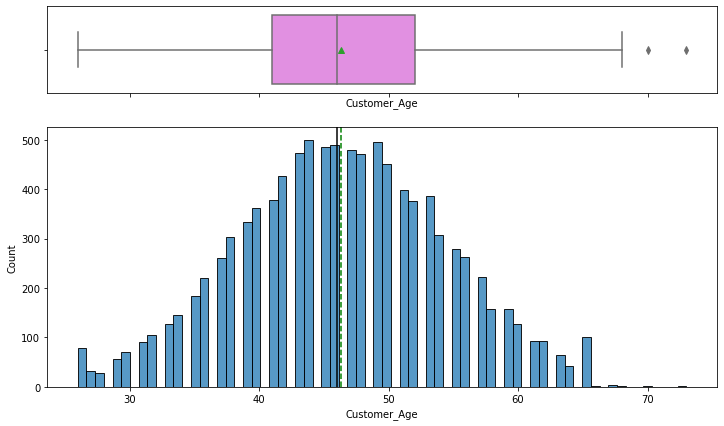

<IPython.core.display.Javascript object>

In [542]:
# Observations on Customer_age
histogram_boxplot(data, "Customer_Age", bins=70)

#### Observations
- As per the boxplot, there are 2 outliers in the 'Age' variable
- Age has a fairly normal distribution with approx equal mean and median

### Outlier- Treatment 
## [Customer_age] ## 

In [543]:
quartiles = np.quantile(
    data["Customer_Age"][data["Customer_Age"].notnull()], [0.25, 0.75]
)
Customer_Age_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Customer_Age_4iqr}")
outlier_Customer_Age = data.loc[
    np.abs(data["Customer_Age"] - data["Customer_Age"].median()) > Customer_Age_4iqr,
    "Customer_Age",
]
outlier_Customer_Age

Q1 = 41.0, Q3 = 52.0, 4*IQR = 44.0


Series([], Name: Customer_Age, dtype: int64)

<IPython.core.display.Javascript object>

### Dependent_count

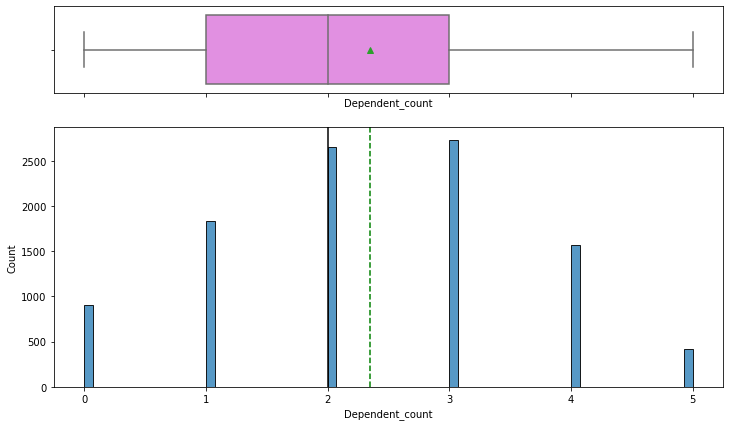

<IPython.core.display.Javascript object>

In [544]:
# Observations on Dependent_count
histogram_boxplot(data, "Dependent_count", bins=70)

#### Observations
- As per the boxplot, there are no outliers in the 'Dependent_count' variable
- This variable is better treated as a categorical variable.
- Hence i will convert it to a categorical variable

In [545]:
data["Dependent_count"].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

<IPython.core.display.Javascript object>

## Months_on_book

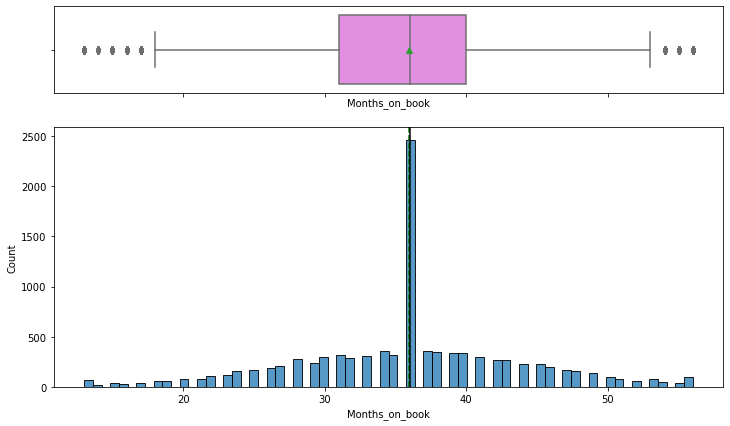

<IPython.core.display.Javascript object>

In [546]:
# Observations on Dependent_count
histogram_boxplot(data, "Months_on_book", bins=70)

- We can see there are some outliers in the **Months_on_book** variable.
- Some variation is always expected in real-world scenarios for the Months_on_book variable but we can remove the data point on the extreme right end of the boxplot as it can be a data entry error.
- It has a fairly normal distribution with approx equal mean and median

### Outlier- Treatment 
## [Months_on_book] ## 

In [547]:
quartiles = np.quantile(
    data["Months_on_book"][data["Months_on_book"].notnull()], [0.25, 0.75]
)
Months_on_book_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Months_on_book_4iqr}")
outlier_Months_on_book = data.loc[
    np.abs(data["Months_on_book"] - data["Months_on_book"].median())
    > Months_on_book_4iqr,
    "Months_on_book",
]
outlier_Months_on_book

Q1 = 31.0, Q3 = 40.0, 4*IQR = 36.0


Series([], Name: Months_on_book, dtype: int64)

<IPython.core.display.Javascript object>

## Total_Relationship_Count

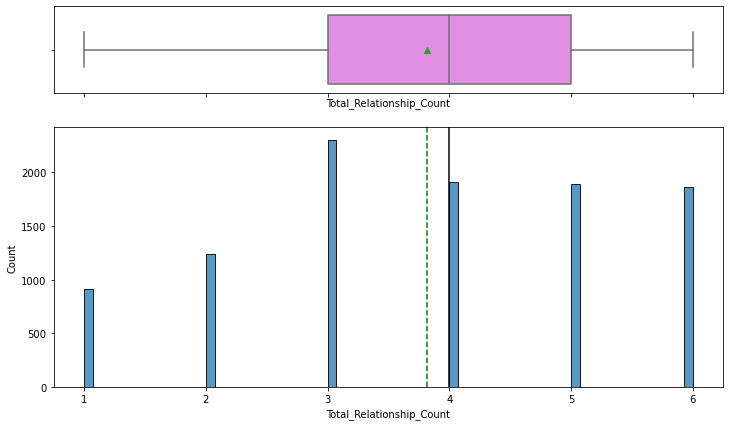

<IPython.core.display.Javascript object>

In [548]:
# Observations on Dependent_count
histogram_boxplot(data, "Total_Relationship_Count", bins=70)

#### Observations
- As per the boxplot, there are no outliers in the 'Total_Relationship_Count' variable
- This variable is better treated as a categorical variable.
- Hence i will convert it to a categorical variable

## Credit_Limit

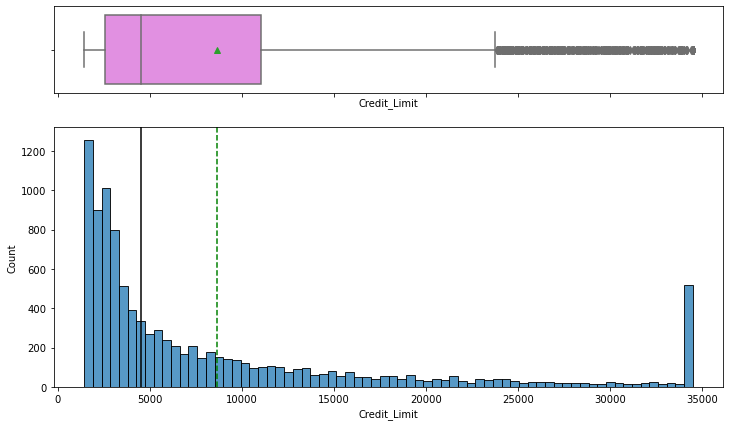

<IPython.core.display.Javascript object>

In [549]:
# Observations on Dependent_count
histogram_boxplot(data, "Credit_Limit", bins=70)

#### Observation.
1. The distribution is highly right-skewed, and Average Credit_Limit of the customer is 8631.95 while the median is 4549.
2. - We can see there are some outliers in the Credit_Limit variable.

### Outlier- Treatment 
## [Credit_Limit] ## 

In [550]:
quartiles = np.quantile(
    data["Credit_Limit"][data["Credit_Limit"].notnull()], [0.25, 0.75]
)
Credit_Limit_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Credit_Limit_4iqr}")
outlier_Credit_Limit = data.loc[
    np.abs(data["Credit_Limit"] - data["Credit_Limit"].median()) > Credit_Limit_4iqr,
    "Credit_Limit",
]
outlier_Credit_Limit

Q1 = 2555.0, Q3 = 11067.5, 4*IQR = 34050.0


Series([], Name: Credit_Limit, dtype: float64)

<IPython.core.display.Javascript object>

## Total_Revolving_Bal

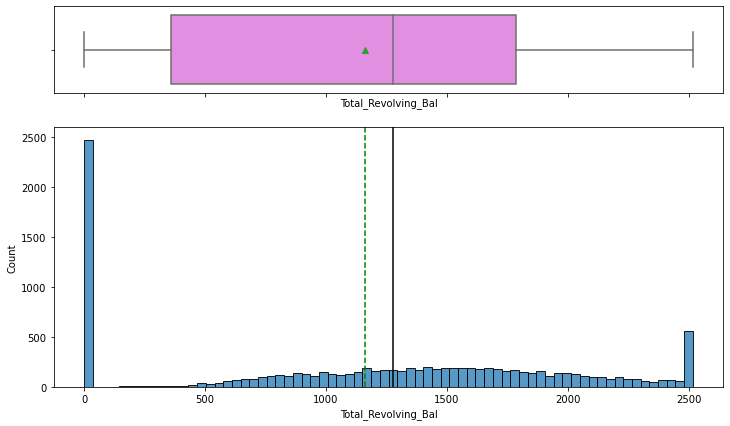

<IPython.core.display.Javascript object>

In [551]:
# Observations on Total_Revolving_Bal
histogram_boxplot(data, "Total_Revolving_Bal", bins=70)

#### Observation.
1. The distribution is a bit skewed to the left, and the average of the Total_Revolving_Bal of the customer is 3.813 while the median is 4.00. These values are very close.
2. We can see there are no outliers in the Total_Revolving_Bal variable.
3. There are some extreme values on the left and right of the distribution. But I will not treat them as some variation is always expected in real-world scenarios for this type of variables.

## Avg_Open_To_Buy

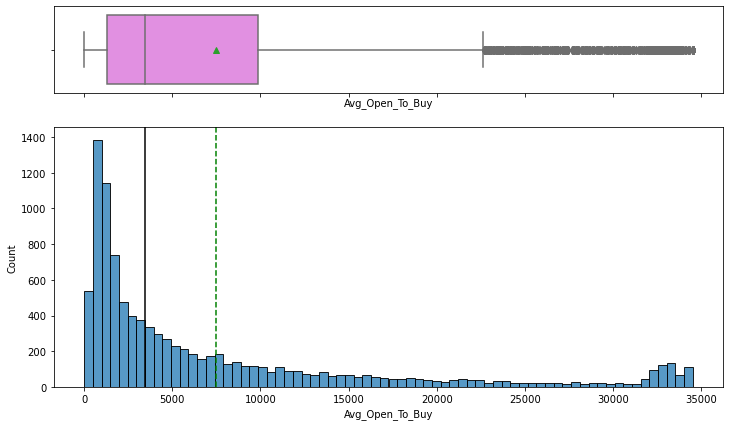

<IPython.core.display.Javascript object>

In [552]:
# Observations on Total_Revolving_Bal
histogram_boxplot(data, "Avg_Open_To_Buy", bins=70)

#### Observation.
1. The distribution is highly right-skewed, and mean of **Avg_Open_To_Buy** is 7469.14 while the median is 3474.
2. - We can see there are some outliers in the **Avg_Open_To_Buy** variable.

### Outlier- Treatment 
## [Avg_Open_To_Buy] ## 

In [553]:
quartiles = np.quantile(
    data["Avg_Open_To_Buy"][data["Avg_Open_To_Buy"].notnull()], [0.25, 0.75]
)
Avg_Open_To_Buy_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Avg_Open_To_Buy_4iqr}")
outlier_Avg_Open_To_Buy = data.loc[
    np.abs(data["Avg_Open_To_Buy"] - data["Avg_Open_To_Buy"].median())
    > Avg_Open_To_Buy_4iqr,
    "Avg_Open_To_Buy",
]
outlier_Avg_Open_To_Buy

Q1 = 1324.5, Q3 = 9859.0, 4*IQR = 34138.0


Series([], Name: Avg_Open_To_Buy, dtype: float64)

<IPython.core.display.Javascript object>

## Total_Amt_Chng_Q4_Q1

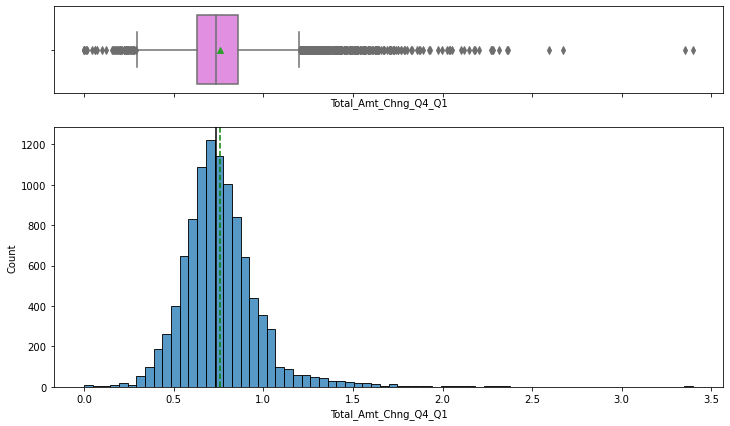

<IPython.core.display.Javascript object>

In [554]:
# Observations on Total_Amt_Chng_Q4_Q1
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", bins=70)

- We can see there are outliers in this variable.

- It has a fairly normal distribution with approx equal mean and median

- There are some observation to the right extreme which can be considered as an outlier. 
- We will not remove all such data points as they represent real market trends but we can cap some of the extreme values.

In [555]:
# Checking 10 largest values of amount spend on meat products
data.Total_Amt_Chng_Q4_Q1.nlargest(10)

12    3.397
8     3.355
773   2.675
2     2.594
219   2.368
47    2.357
46    2.316
658   2.282
58    2.275
466   2.271
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

<IPython.core.display.Javascript object>

In [556]:
data[data["Total_Amt_Chng_Q4_Q1"] > 2.275]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
8,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.000,2517,19835.000,3.355,1350,24,1.182,0.113
12,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.000,0,11751.000,3.397,1539,17,3.250,0.000
46,Existing Customer,56,M,2,Doctorate,Married,$60K - $80K,Blue,45,6,2,0,2283.000,1430,853.000,2.316,1741,27,0.588,0.626
47,Existing Customer,59,M,1,Doctorate,Married,$40K - $60K,Blue,52,3,2,2,2548.000,2020,528.000,2.357,1719,27,1.700,0.793
219,Existing Customer,44,F,3,Uneducated,Divorced,Less than $40K,Silver,38,4,1,3,11127.000,1835,9292.000,2.368,1546,25,1.273,0.165
658,Existing Customer,46,M,4,Graduate,Married,$60K - $80K,Blue,35,5,1,2,1535.000,700,835.000,2.282,1848,25,1.083,0.456
773,Existing Customer,61,M,0,Post-Graduate,Married,abc,Blue,53,6,2,3,14434.000,1927,12507.000,2.675,1731,32,3.571,0.134


<IPython.core.display.Javascript object>

- The values for **Total_Amt_Chng_Q4_Q1** for these 4 observations need not be incorrect
- So, dropping them will lead us to loss of information
- Let's cap them with next highest value

In [557]:
# Capping values for amount spent on meat products at next highest value i.e. 984
data["Total_Amt_Chng_Q4_Q1"].clip(upper=2.271, inplace=True)

<IPython.core.display.Javascript object>

##### The remaining outliers will be treated below

### Outlier- Treatment 
## [Total_Amt_Chng_Q4_Q1] ## 

In [558]:
quartiles = np.quantile(
    data["Total_Amt_Chng_Q4_Q1"][data["Total_Amt_Chng_Q4_Q1"].notnull()], [0.25, 0.75]
)
Total_Amt_Chng_Q4_Q1_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Total_Amt_Chng_Q4_Q1_4iqr}")
outlier_Total_Amt_Chng_Q4_Q1 = data.loc[
    np.abs(data["Total_Amt_Chng_Q4_Q1"] - data["Total_Amt_Chng_Q4_Q1"].median())
    > Total_Amt_Chng_Q4_Q1_4iqr,
    "Total_Amt_Chng_Q4_Q1",
]
outlier_Total_Amt_Chng_Q4_Q1

Q1 = 0.631, Q3 = 0.859, 4*IQR = 0.9119999999999999


2      2.271
4      2.175
6      1.975
7      2.204
8      2.271
12     2.271
15     1.707
16     1.708
18     1.831
32     1.726
33     1.750
36     1.724
46     2.271
47     2.271
58     2.271
68     1.715
88     1.932
89     1.702
94     1.705
95     1.656
113    1.674
115    1.826
117    1.873
137    1.689
142    1.996
154    2.121
177    2.053
180    1.791
190    1.768
219    2.271
231    1.727
284    2.145
295    1.859
336    1.707
431    2.023
466    2.271
658    2.271
773    2.271
841    2.180
855    1.867
869    1.924
1085   2.041
1176   1.893
1219   2.103
1369   1.749
1455   1.787
1486   1.800
1570   1.676
1689   1.705
1718   1.769
1873   2.037
1883   1.669
2337   1.743
2565   1.731
3270   1.675
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

<IPython.core.display.Javascript object>

## Total_Trans_Amt

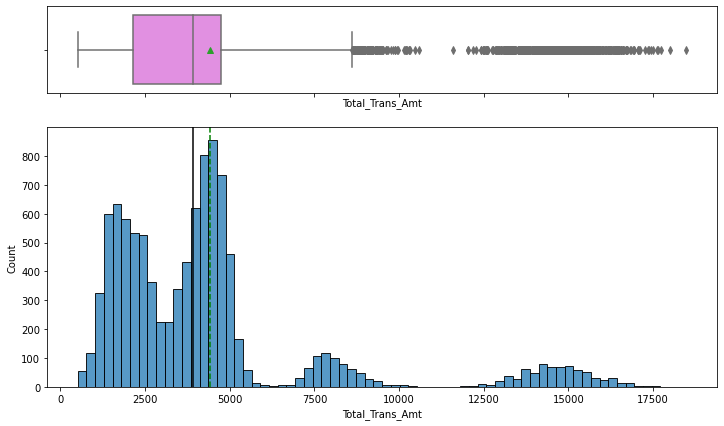

<IPython.core.display.Javascript object>

In [559]:
# Observations on Total_Trans_Amt
histogram_boxplot(data, "Total_Trans_Amt", bins=70)

#### Observation.
1. The distribution is right-skewed, and mean of **Total_Trans_Amt** is 4404.086 while the median is 4741.
2. We can see there are alot of outliers in the **Total_Trans_Amt** variable.
3. There are some observation to the right extreme which can be considered as an outlier. 
4. We will not remove all such data points as they represent real market trends but we can cap some of the extreme values.

In [560]:
# Checking 10 largest values of amount spend on meat products
data.Total_Trans_Amt.nlargest(10)

9964     18484
10073    17995
10097    17744
9601     17634
9341     17628
10117    17498
10028    17437
9643     17390
9712     17350
9645     17258
Name: Total_Trans_Amt, dtype: int64

<IPython.core.display.Javascript object>

In [561]:
data[data["Total_Trans_Amt"] > 11000]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8968,Existing Customer,50,M,1,High School,Married,Less than $40K,Blue,35,2,1,3,3968.000,2264,1704.000,1.098,12535,118,0.815,0.571
9103,Existing Customer,31,F,0,Uneducated,Divorced,Less than $40K,Silver,23,2,2,1,10850.000,1873,8977.000,0.995,13794,127,0.789,0.173
9106,Existing Customer,41,F,2,is_missing,Married,abc,Blue,21,2,3,1,14746.000,0,14746.000,0.857,14771,127,0.628,0.000
9125,Existing Customer,51,M,2,Graduate,Married,$40K - $60K,Blue,45,2,2,2,11467.000,1146,10321.000,1.018,14373,97,0.764,0.100
9128,Existing Customer,30,M,1,High School,Married,$60K - $80K,Blue,16,1,3,3,15795.000,1742,14053.000,1.022,13173,96,0.846,0.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,1,2,3,13187.000,2241,10946.000,0.689,15354,112,0.931,0.170
10117,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,6,3,4,17925.000,1909,16016.000,0.712,17498,111,0.820,0.106
10120,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,5,2,0,13940.000,2109,11831.000,0.660,15577,114,0.754,0.151
10121,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.000,606,3082.000,0.570,14596,120,0.791,0.164


<IPython.core.display.Javascript object>

In [562]:
# Capping values for amount spent on meat products at next highest value i.e. 984
data["Total_Trans_Amt"].clip(upper=10500, inplace=True)

<IPython.core.display.Javascript object>

##### The remaining outliers will be treated below

In [563]:
quartiles = np.quantile(
    data["Total_Trans_Amt"][data["Total_Trans_Amt"].notnull()], [0.25, 0.75]
)
Total_Trans_Amt_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Total_Trans_Amt_4iqr}")
outlier_Total_Trans_Amt = data.loc[
    np.abs(data["Total_Trans_Amt"] - data["Total_Trans_Amt"].median())
    > Total_Trans_Amt_4iqr,
    "Total_Trans_Amt",
]
outlier_Total_Trans_Amt

Q1 = 2155.5, Q3 = 4741.0, 4*IQR = 10342.0


Series([], Name: Total_Trans_Amt, dtype: int64)

<IPython.core.display.Javascript object>

## Total_Trans_Ct

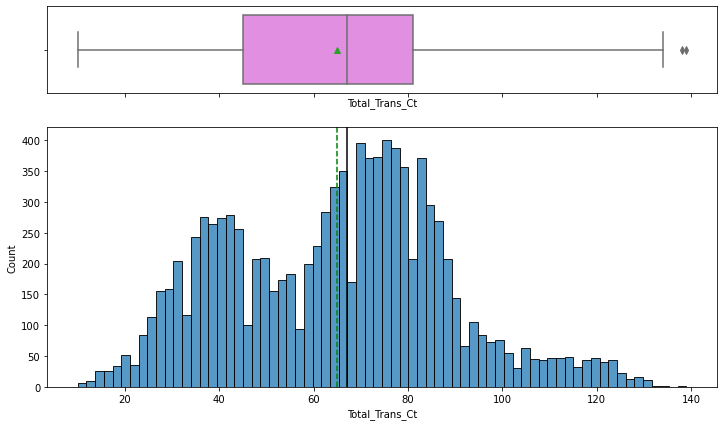

<IPython.core.display.Javascript object>

In [564]:
# Observations on Total_Trans_Amt
histogram_boxplot(data, "Total_Trans_Ct", bins=70)

#### Observation.
1. The distribution is a bit left-skewed, and mean of **Total_Trans_Ct** is 64.859 while the median is 67.0.
2. We can see there are some outliers in the **Total_Trans_Ct** variable.
3. **Hence, i will treat the outlines as shown below**

In [565]:
quartiles = np.quantile(
    data["Total_Trans_Ct"][data["Total_Trans_Ct"].notnull()], [0.25, 0.75]
)
Total_Trans_Ct_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Total_Trans_Ct_4iqr}")
outlier_Total_Trans_Ct = data.loc[
    np.abs(data["Total_Trans_Ct"] - data["Total_Trans_Ct"].median())
    > Total_Trans_Ct_4iqr,
    "Total_Trans_Ct",
]
outlier_Total_Trans_Ct

Q1 = 45.0, Q3 = 81.0, 4*IQR = 144.0


Series([], Name: Total_Trans_Ct, dtype: int64)

<IPython.core.display.Javascript object>

## Total_Ct_Chng_Q4_Q1

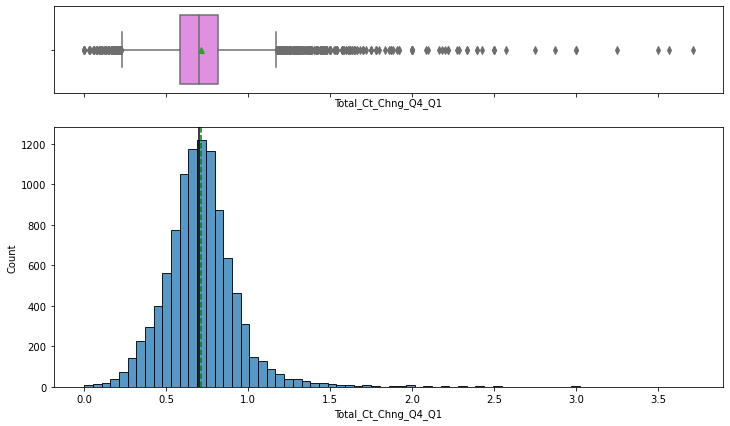

<IPython.core.display.Javascript object>

In [566]:
# Observations on Total_Ct_Chng_Q4_Q1
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", bins=70)

#### Observation.
1. The distribution is a right-skewed, and mean of **Total_Ct_Chng_Q4_Q1** is 0.712 while the median is 0.702.
2. We can see there are alot of outliers in the **Total_Ct_Chng_Q4_Q1** variable.
3. **Hence, i will treat the outlines as shown below**

In [567]:
quartiles = np.quantile(
    data["Total_Ct_Chng_Q4_Q1"][data["Total_Ct_Chng_Q4_Q1"].notnull()], [0.25, 0.75]
)
Total_Ct_Chng_Q4_Q1_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Total_Ct_Chng_Q4_Q1_4iqr}")
outlier_Total_Ct_Chng_Q4_Q1 = data.loc[
    np.abs(data["Total_Ct_Chng_Q4_Q1"] - data["Total_Ct_Chng_Q4_Q1"].median())
    > Total_Ct_Chng_Q4_Q1_4iqr,
    "Total_Ct_Chng_Q4_Q1",
]
outlier_Total_Ct_Chng_Q4_Q1

Q1 = 0.582, Q3 = 0.818, 4*IQR = 0.944


1      3.714
2      2.333
3      2.333
4      2.500
12     3.250
13     2.000
15     1.700
30     2.571
32     1.667
47     1.700
52     1.923
68     2.400
69     2.000
76     1.875
84     2.000
88     1.800
91     2.182
113    3.000
131    2.200
146    2.875
151    1.909
158    2.429
162    2.167
167    2.286
190    3.000
231    2.000
239    2.273
269    3.500
280    2.400
281    1.667
294    2.083
300    2.000
309    2.100
322    1.750
323    1.875
324    1.875
346    1.833
366    2.750
418    1.778
456    2.000
697    1.857
757    2.222
760    1.778
773    3.571
805    2.500
1041   1.750
1095   2.222
1187   1.647
1256   2.000
1455   2.000
1778   1.700
2099   1.722
2358   1.882
2510   2.500
2565   1.647
2683   1.750
2696   1.923
4146   1.783
4597   1.650
9977   1.684
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

<IPython.core.display.Javascript object>

## Avg_Utilization_Ratio

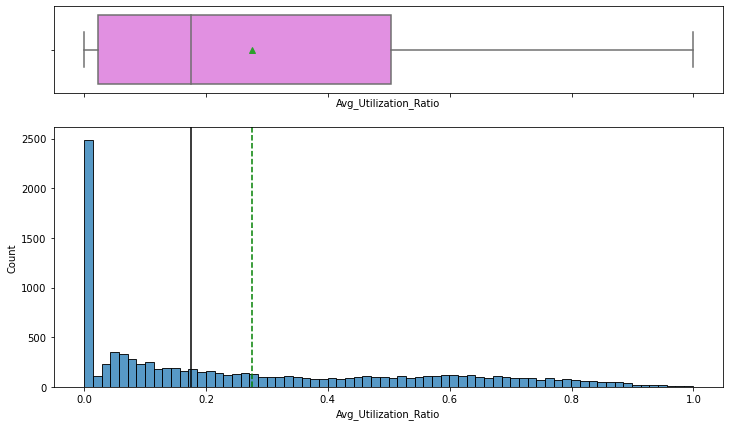

<IPython.core.display.Javascript object>

In [568]:
# Observations on Avg_Utilization_Ratio
histogram_boxplot(data, "Avg_Utilization_Ratio", bins=70)

### Observation
1.  There are no outliers in the 'Avg_Utilization_Ratio' variable
2. The distribution highly right-skewed, and mean of **Avg_Utilization_Ratio** is 0.275 while the median is 0.176.

## UNIVARIANT ANALYSIS For the Categorical Variables

In [569]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

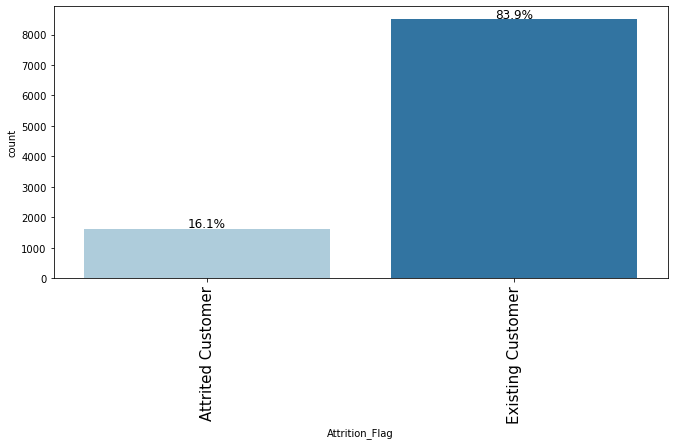

<IPython.core.display.Javascript object>

In [570]:
labeled_barplot(data, "Attrition_Flag", perc=True, n=10)

#### Observations.
1. The data contains 2 different category of customers: the "Attrited Customer" and "Existing Customer"
2. 83.9% of the customers are Existing customers.
3. 16.1% of the customers are Attrited customers.
4. There are more **Existing** customers than **Attrited** customers

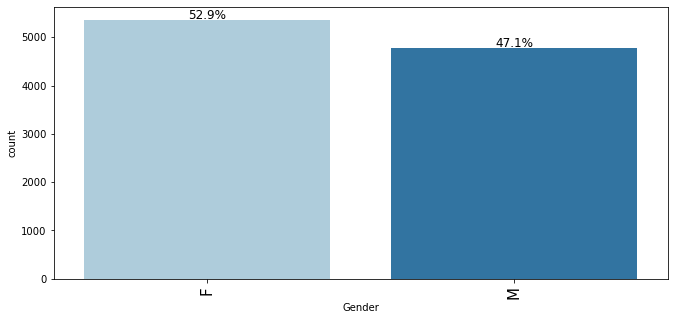

<IPython.core.display.Javascript object>

In [571]:
labeled_barplot(data, "Gender", perc=True, n=10)

#### Observations.
1. The data contains 2 different Gender type: the "Male Customers" and "Female Customers"
2. Majority of the customers are Female..


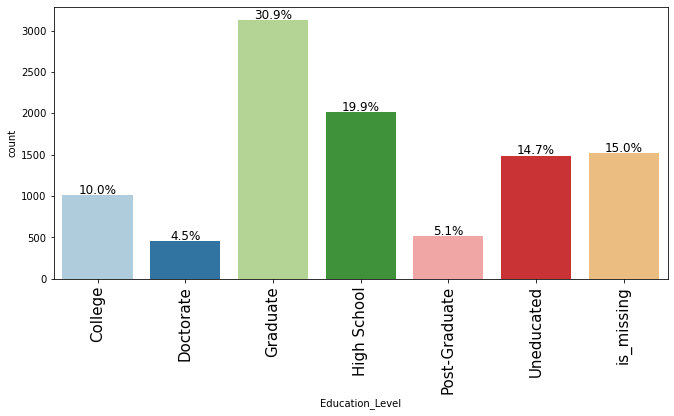

<IPython.core.display.Javascript object>

In [572]:
labeled_barplot(data, "Education_Level", perc=True, n=10)

#### Observations.
1. The data reveals 7 different unique Education_Level of the customers.
2. Majority of the customers are Graduates.
3. Minority of the customers are on Doctorate level.


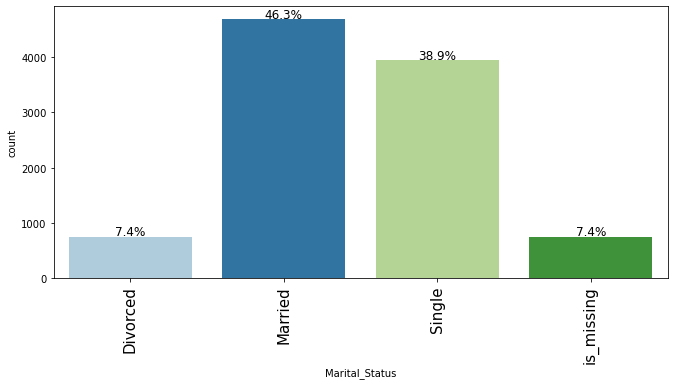

<IPython.core.display.Javascript object>

In [573]:
labeled_barplot(data, "Marital_Status", perc=True, n=10)

#### Observations.
1. The data contains 3 classification of customer: Those that are Divorced, Married, Single nd missing data.
2. Majority of the customers are Married.

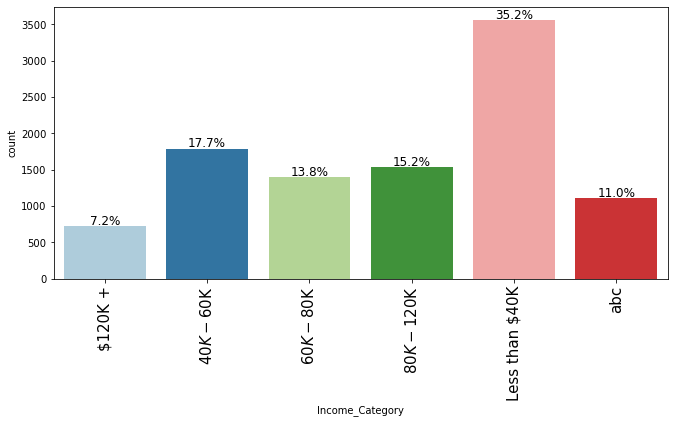

<IPython.core.display.Javascript object>

In [574]:
labeled_barplot(data, "Income_Category", perc=True, n=10)

#### Observations.
1. The data contains 6 classification of the Customers according to their income.
2. Majority of the customers earn less than $40k annually.

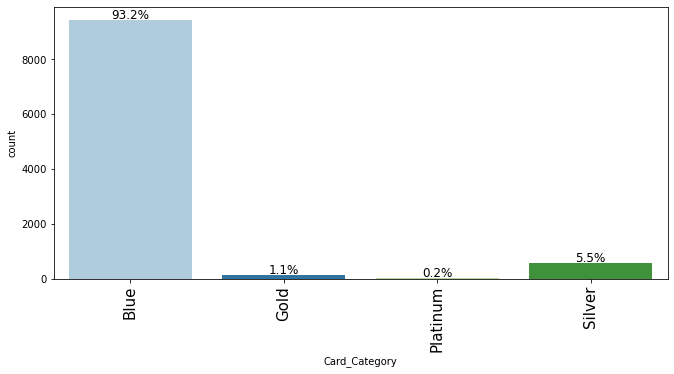

<IPython.core.display.Javascript object>

In [575]:
labeled_barplot(data, "Card_Category", perc=True, n=10)

#### Observations.
1. The data contains 4 classification of the Customers according to their type of Card.
2. Majority of the customers use **Blue Card type**.
3. Few customers(0.2%) use the **Platinum card type**.

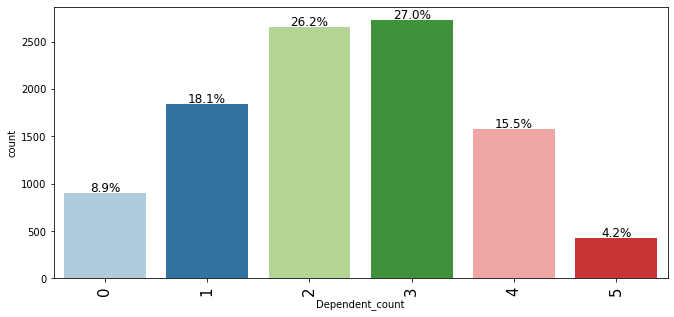

<IPython.core.display.Javascript object>

In [576]:
labeled_barplot(data, "Dependent_count", perc=True, n=10)

#### Observations.
1. The data contains 6 different category of dependents.
2. 27% of the customers have 3 dependents.

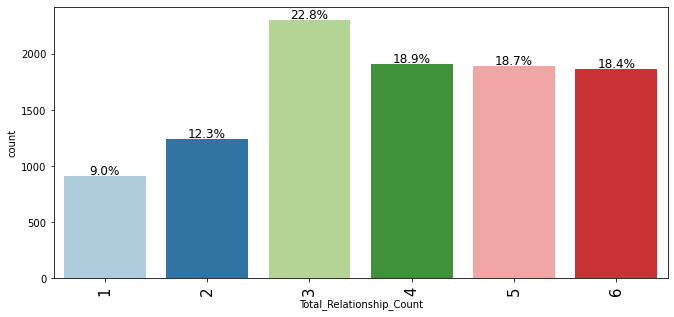

<IPython.core.display.Javascript object>

In [577]:
labeled_barplot(data, "Total_Relationship_Count", perc=True, n=10)

#### Observations.
1. The Total no. of products held by the customers are in 6 different categories.
2. 22.8% of the customers holds 3 products.

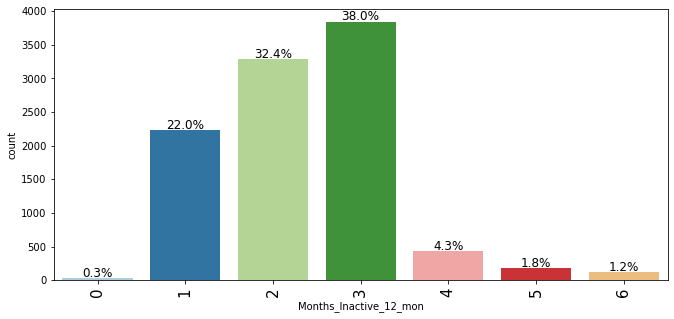

<IPython.core.display.Javascript object>

In [578]:
labeled_barplot(data, "Months_Inactive_12_mon", perc=True, n=10)

#### Observations.
1. In the last 12 months, some customers were inactive for some months. 
2. 38.0% of the customers were inactive for 3 months.

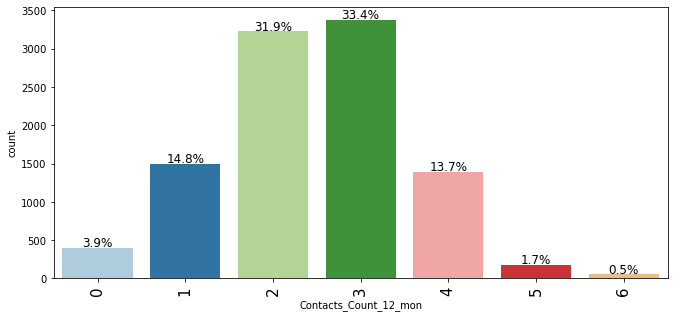

<IPython.core.display.Javascript object>

In [579]:
labeled_barplot(data, "Contacts_Count_12_mon", perc=True, n=10)

#### Observations.
1. In the last 12 months, some customers contacted the bank several times.
2. 33.4% of the customers contacted the bank 3 times in the last 12 months
3. 3.9% of the customers did not contact the bank at all in the last 12 months 

### NOTE
The following additional columns will be treated as categorical variables instead of Integers.
1. Dependent_count.
2. Total_Relationship_Count
3. Months_Inactive_12_mon. 
4. Contacts_Count_12_mon.

In [580]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  object  
 5   Marital_Status            10127 non-null  object  
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<IPython.core.display.Javascript object>

# 1.17B Bivariate Analysis.

Through bivariate analysis we try to analyze two variables simultaneously. I will try to determine if there is any relationship between two variables from the dataset.

For this type of analysis, we can use use:
1. Pairplot.
2. Heatmap function in seaborn.
3. Pointplot.
3. Barplot or
4. Scatter plot.

Exploring the Relationship between numerical variables using **pair plots** and **correlation plots**.

sns.pairplot(data=data, hue="Attrition_Flag")
plt.show()

## plotting a Heatmap

In [581]:
correlation = data.corr()  # creating a 2-D Matrix with correlation plots
correlation

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000,-0.122,0.789,-0.011,0.054,-0.018,0.002,0.015,0.001,-0.063,-0.044,-0.067,-0.012,0.007
Dependent_count,-0.122,1.000,-0.103,-0.039,-0.011,-0.041,0.068,-0.003,0.068,-0.035,0.041,0.050,0.011,-0.037
Months_on_book,0.789,-0.103,1.000,-0.009,0.074,-0.011,0.008,0.009,0.007,-0.050,-0.036,-0.050,-0.014,-0.008
Total_Relationship_Count,-0.011,-0.039,-0.009,1.000,-0.004,0.055,-0.071,0.014,-0.073,0.050,-0.362,-0.242,0.041,0.068
Months_Inactive_12_mon,0.054,-0.011,0.074,-0.004,1.000,0.029,-0.020,-0.042,-0.017,-0.034,-0.035,-0.043,-0.039,-0.008
Contacts_Count_12_mon,-0.018,-0.041,-0.011,0.055,0.029,1.000,0.021,-0.054,0.026,-0.022,-0.130,-0.152,-0.095,-0.055
Credit_Limit,0.002,0.068,0.008,-0.071,-0.020,0.021,1.000,0.042,0.996,0.012,0.161,0.076,-0.002,-0.483
Total_Revolving_Bal,0.015,-0.003,0.009,0.014,-0.042,-0.054,0.042,1.000,-0.047,0.059,0.055,0.056,0.090,0.624
Avg_Open_To_Buy,0.001,0.068,0.007,-0.073,-0.017,0.026,0.996,-0.047,1.000,0.007,0.156,0.071,-0.010,-0.539
Total_Amt_Chng_Q4_Q1,-0.063,-0.035,-0.050,0.050,-0.034,-0.022,0.012,0.059,0.007,1.000,0.047,0.008,0.379,0.037


<IPython.core.display.Javascript object>

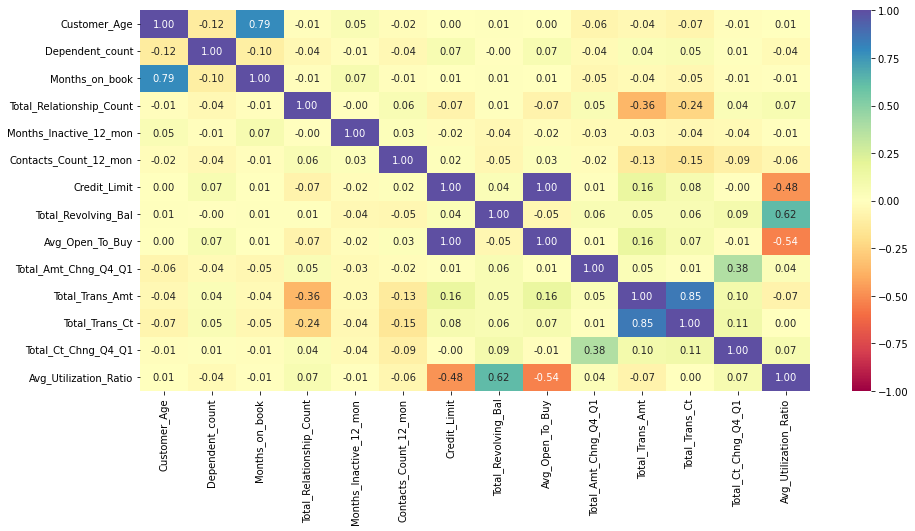

<IPython.core.display.Javascript object>

In [582]:
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observations.
1. The **Months_on_book** and the **Customer_Age**  are highly(positive) correlated. 0.79 is the correlation. So, i will drop one of the columns,
2. The **Average_Utilization_Ratio**  and the **Credit_Limit** has a negative correlation. -0.46 is the correlation.
3. The **Average_Utilization_Ratio**  and the **Total_Revolving_Bal** have a slightly high positive correlation. 0.62 is the correlation.  

4. **Avg_Open_To_Buy** and **Credit_Limit** have a high positive correlation. We can drop one of them.
5. 8. The **Total_Trans_Ct**  and the **Total_Trans_Amt** has a very high positive correlation. 0.85 is the correlation.We can drop one of them.

6. The **Average_Utilization_Ratio**  and the **Avg_Open_To_Buy** has a negative correlation. -0.54 is the correlation.
7. The **Total_Ct_Chng_Q4_Q1**  and the **Total_Amt_Chng_Q4_Q1** has a low positive correlation. 0.38 is the correlation.
8. The **Credit_Limit**  and the **Total_Trans_Amt** has a very low negative correlation. 0.16 is the correlation.
9. The **Avg_Open_To_Buy**  and the **Total_Trans_Amt** has a very low correlation. 0.16 is the correlation.
10. The **Credit_Limit**  and the **Average_Utilization_Ratio** has a very low negative correlation. -0.48 is the correlation.

In [583]:
# Dropping birth year and Dt_Customer columns
data.drop(
    columns=["Avg_Open_To_Buy", "Total_Trans_Ct", "Months_on_book"],
    inplace=True,
)

<IPython.core.display.Javascript object>

# Customer Behavioural data:

### Exploring the categorical features
I will check the relationship betwwen the **Target** variable with some of the **categorical** columns in my data

In [584]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

## Attrition_Flag vs Gender

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


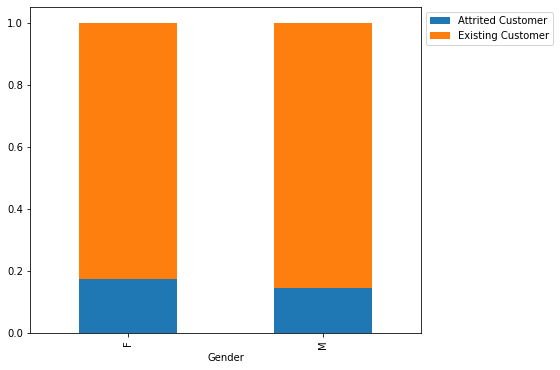

<IPython.core.display.Javascript object>

In [585]:
stacked_barplot(data, "Gender", "Attrition_Flag")

1. The Data shows that majority of the **existing customers** are MALE
2. Majority of the **attrited customers** also Female. 

## Attrition_Flag vs Education_Level

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
All                           1627               8500  10127
Graduate                       487               2641   3128
High School                    306               1707   2013
is_missing                     256               1263   1519
Uneducated                     237               1250   1487
College                        154                859   1013
Doctorate                       95                356    451
Post-Graduate                   92                424    516
------------------------------------------------------------------------------------------------------------------------


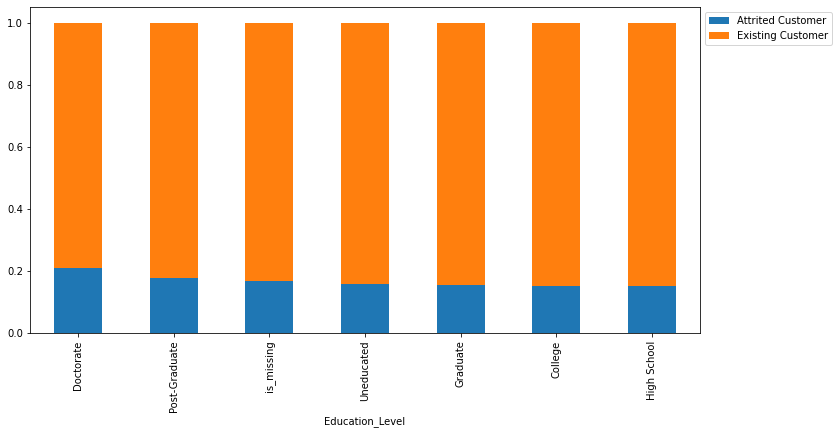

<IPython.core.display.Javascript object>

In [586]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

1. We can see a clear trend here that the majority of the existing customers have less education.
2. The figure above shows that as the **[Education_Level],** increases, the customers begin to **attrited**.
3. We saw earlier that customers customers with a Doctorate degree are more likely to leave credit cards services than customers with lesser education.


## Attrition_Flag vs Marital_Status

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
All                          1627               8500  10127
Married                       709               3978   4687
Single                        668               3275   3943
is_missing                    129                620    749
Divorced                      121                627    748
------------------------------------------------------------------------------------------------------------------------


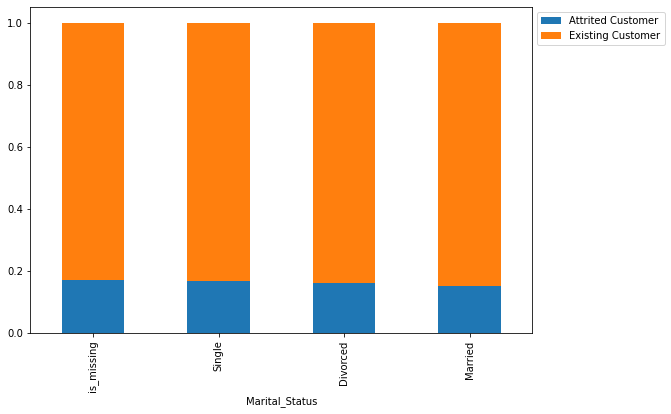

<IPython.core.display.Javascript object>

In [587]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

1. We can see a clear trend here that the majority of the existing customers are **married or divorced**.
2. **Divorced customers** are more likely to use credit cards services than **single customers**.
3. **Married customers** are more likely to use credit cards services than other groups.

## Attrition_Flag vs Income_Category

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


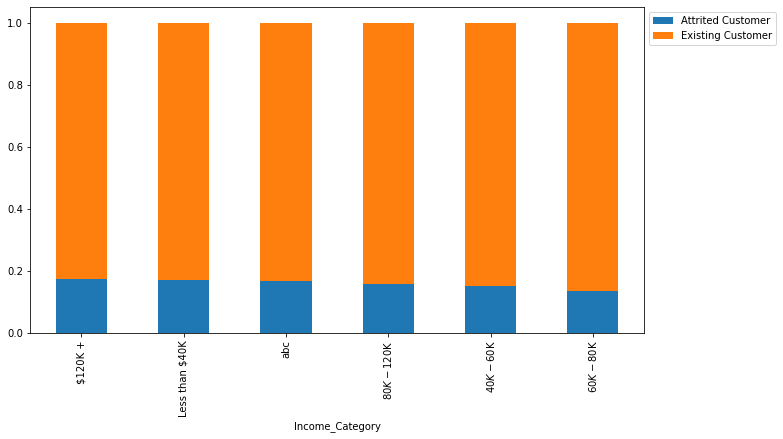

<IPython.core.display.Javascript object>

In [588]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

1. We can see a clear trend here that the majority of the existing customers are **earn below 80k annually**.
2. **60k-80k income customers** are more likely to use credit cards services than  **120k+ income customer**.


## Attrition_Flag vs Card_Category

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


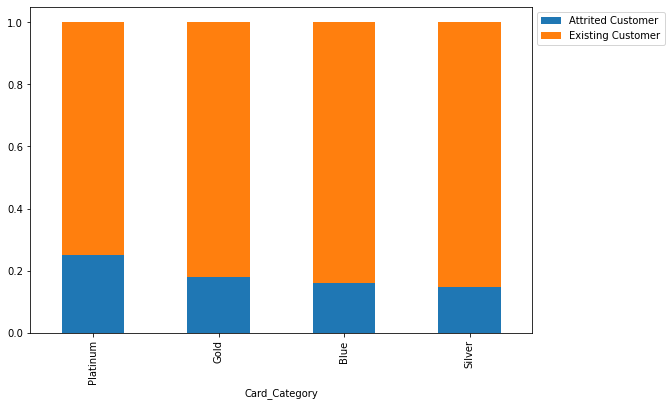

<IPython.core.display.Javascript object>

In [589]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

1. We can see a clear trend here that the majority of the existing customers use **Silver** cards.
2. Customers that use **Silver cards** are more likely to use credit cards services than Customers that use **Platinum cards**

## Attrition_Flag vs Dependent_count

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


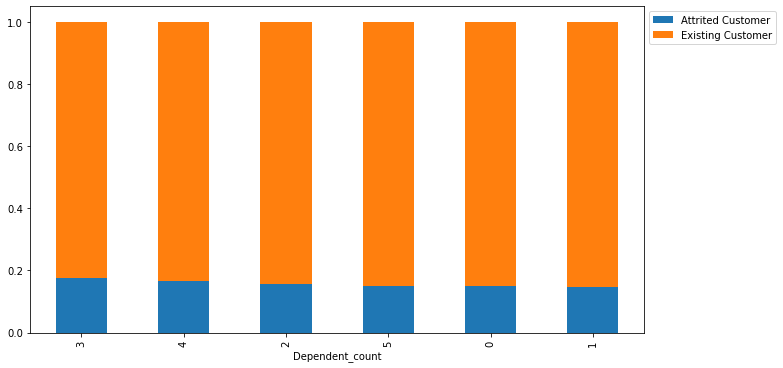

<IPython.core.display.Javascript object>

In [590]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

1. Customers with lower dependents are more likely to use credit cards services than customers with **higher dependent**


## Attrition_Flag vs Total_Relationship_Count

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


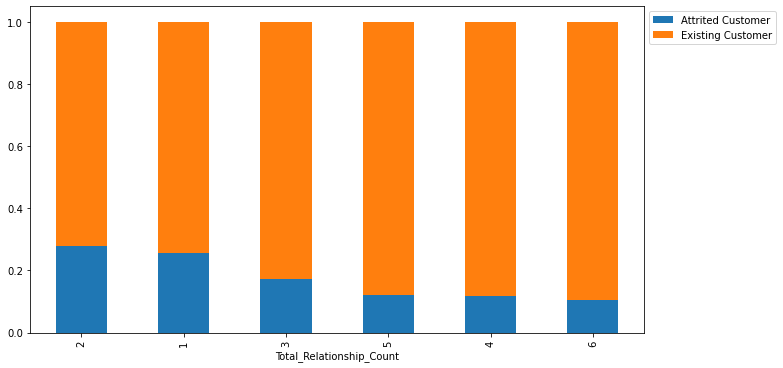

<IPython.core.display.Javascript object>

In [591]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

1. Customers with **higher number of products held** are more likely to use credit cards services than other customers with **lesser number of products held**.


## Attrition_Flag vs Months_Inactive_12_mon

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


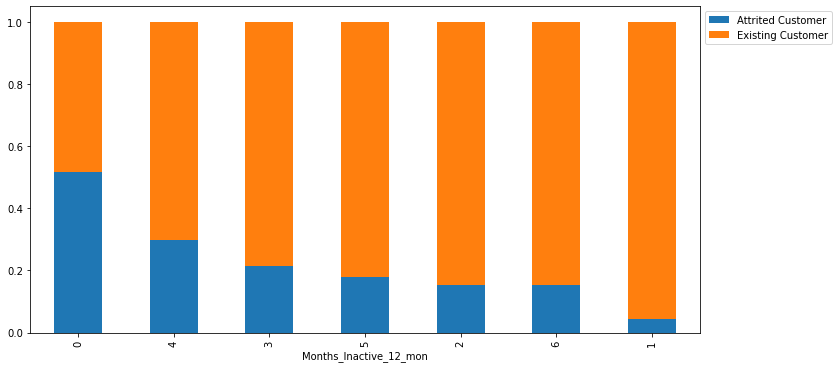

<IPython.core.display.Javascript object>

In [592]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

1. We can see a clear trend here that the majority of the existing customers have zero number of inactive months in the last 12 months.

## Attrition_Flag vs Contacts_Count_12_mon

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


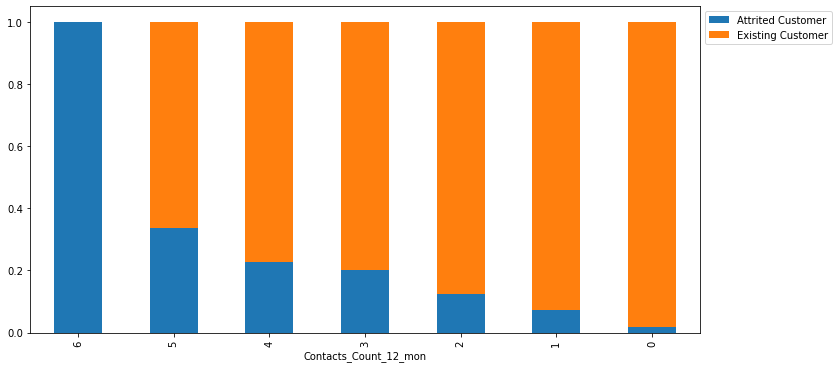

<IPython.core.display.Javascript object>

In [593]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

1. Customers with more contacts with bank in the last 12 months are more likely to be **attrited**
2. Customers with zero contacts with bank in the last 12 months are the **existing customers**

# 1.18 STEP C-
### Data Preprocessing ***continues*** here- FEATURE ENGINEERING

#### Transformation of Variables

### Log transformation

Some of features are very skewed and will likely behave better after Log Transformation.



In [605]:
# copying data to another varaible to avoid any changes to original data
for_feature_engineering = data.copy()
for_feature_engineering

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000


<IPython.core.display.Javascript object>

In [606]:
for col in dist_cols:
    for_feature_engineering[col + "_log"] = np.log(for_feature_engineering[col] + 1)

# dropping the original columns
for_feature_engineering.drop(dist_cols, axis=1, inplace=True)
for_feature_engineering.head()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Avg_Open_To_Buy,Total_Trans_Ct,Customer_Age_log,Dependent_count_log,Total_Relationship_Count_log,Months_Inactive_12_mon_log,Contacts_Count_12_mon_log,Credit_Limit_log,Total_Revolving_Bal_log,Total_Amt_Chng_Q4_Q1_log,Total_Trans_Amt_log,Total_Ct_Chng_Q4_Q1_log,Avg_Utilization_Ratio_log
0,Existing Customer,M,High School,Married,$60K - $80K,Blue,39,11914.000,42,3.829,1.386,1.792,0.693,1.386,9.449,6.657,0.848,7.043,0.965,0.059
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue,44,7392.000,33,3.912,1.792,1.946,0.693,1.099,9.019,6.763,0.933,7.164,1.551,0.100
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue,36,3418.000,20,3.951,1.386,1.609,0.693,0.000,8.137,0.000,1.279,7.543,1.204,0.000
3,Existing Customer,F,High School,NaN,Less than $40K,Blue,34,796.000,20,3.714,1.609,1.386,1.609,0.693,8.106,7.831,0.878,7.066,1.204,0.565
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue,21,4716.000,28,3.714,1.386,1.792,0.693,0.000,8.459,0.000,1.155,6.706,1.253,0.000


<IPython.core.display.Javascript object>

## Log Transformed Columns

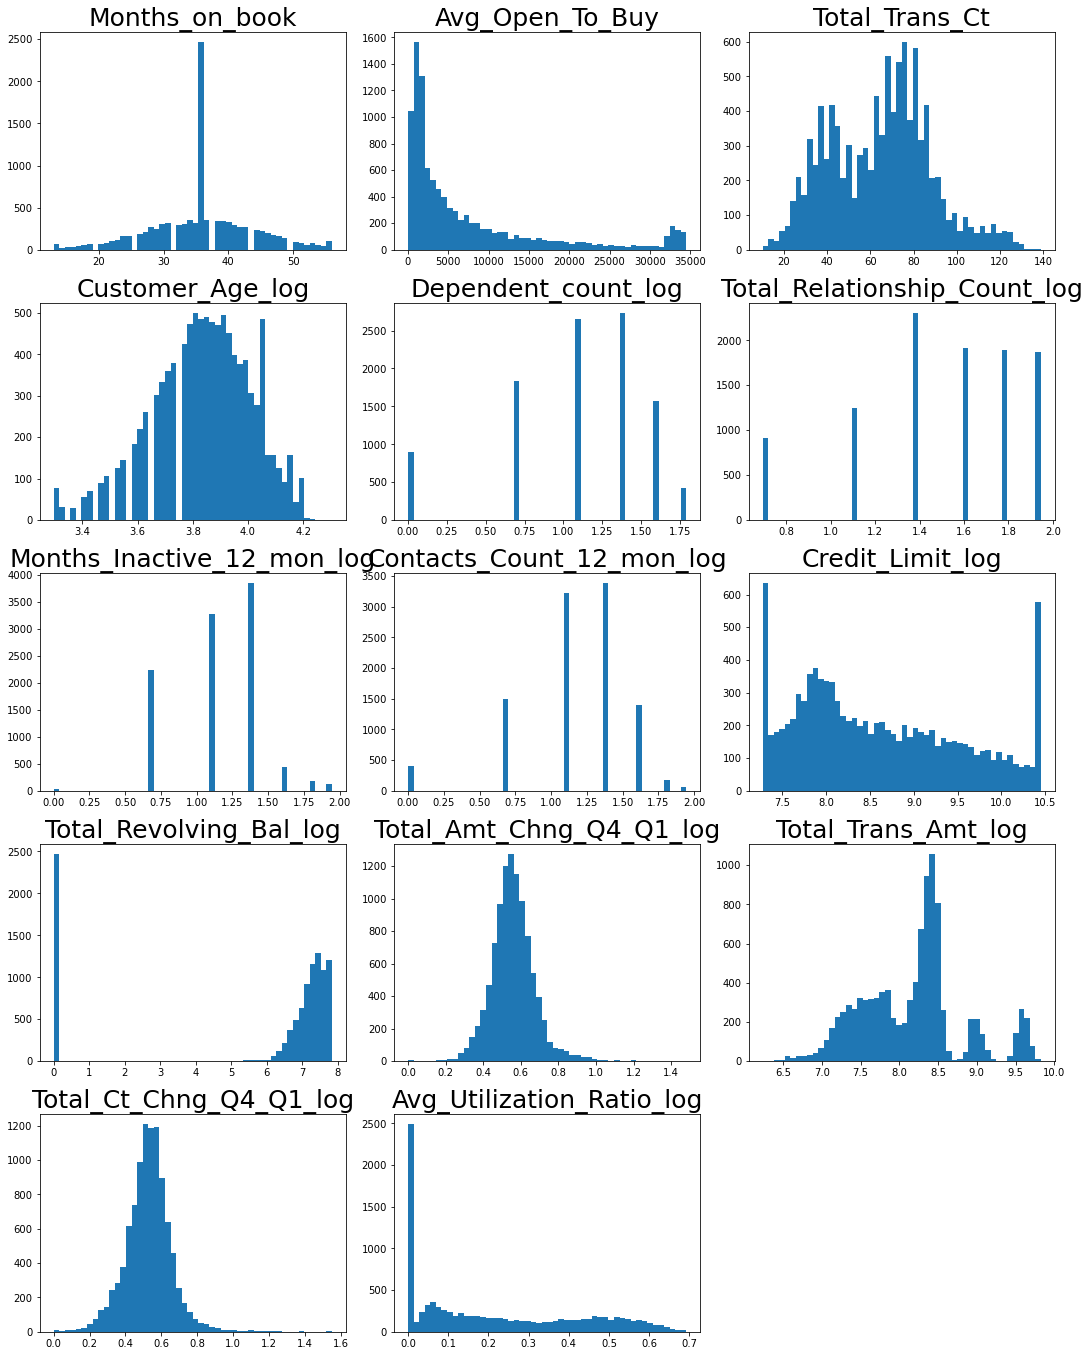

<IPython.core.display.Javascript object>

In [607]:
# list of numerical columns
dist_cols = [
    item
    for item in for_feature_engineering.select_dtypes(include=np.number).columns
    if "tag" not in item
]

#  plotting a histogram of all Numerical columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(for_feature_engineering[dist_cols[i]], bins=50)

    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

## Plotting the Transformed data

#### Observations.
1. The columns have been Transformed.
2. The Heavy skewness in some of the columns has been reduced.
3. Few of the features have become a nearly normal distribution
4. Age has a fairly normal distribution with approx equal mean and median.
5. Months_on_book has a fairly normal distribution with approx equal mean and median.
6. The distribution of Credit_Limit is highly right-skewed.
 

## Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.


**The values obtained might not be integer always which is not be the best way to impute categorical values**
- To take care of that we will round off the obtained values to nearest integer value

In [432]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "Gender",
    "Education_Level",
    "Marital_Status",
    "Income_Category",
    "Card_Category",
]


<IPython.core.display.Javascript object>

In [433]:
data[reqd_col_for_impute].head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,is_missing,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


<IPython.core.display.Javascript object>

In [434]:
data1 = data.copy()

<IPython.core.display.Javascript object>

In [435]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
Gender = {"F": 0, "M": 1}
data1["Gender"] = data1["Gender"].map(Gender)

Education_Level = {
    "Doctorate": 0,
    "Post-Graduate": 1,
    "is_missing": 2,
    "Uneducated": 3,
    "Graduate": 4,
    "College": 5,
    "High School": 6,
}
data1["Education_Level"] = data1["Education_Level"].map(Education_Level)

Marital_Status = {"is_missing": 0,"Single": 1, "Divorced": 2, "Married": 3}
data1["Marital_Status"] = data1["Marital_Status"].map(Marital_Status)

Income_Category = { "$120K +": 0, "$40K - $60K": 1, "$60K - $80K": 2, "$80K - $120K": 3, "Less than $40K": 4,"abc": 5,}
data1["Income_Category"] = data1["Income_Category"].map(Income_Category)


Card_Category = {"Platinum": 0, "Gold": 1, "Blue": 2, "Silver": 3}
data1["Card_Category"] = data1["Card_Category"].map(Card_Category)




<IPython.core.display.Javascript object>

In [436]:
data1

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,1,3,6,3,2,2,5,1,3,12691.000,777,1.335,1144,1.625,0.061
1,Existing Customer,49,0,5,4,1,4,2,6,1,2,8256.000,864,1.541,1291,3.714,0.105
2,Existing Customer,51,1,3,4,3,3,2,4,1,0,3418.000,0,2.271,1887,2.333,0.000
3,Existing Customer,40,0,4,6,0,4,2,3,4,1,3313.000,2517,1.405,1171,2.333,0.760
4,Existing Customer,40,1,3,3,3,2,2,5,1,0,4716.000,0,2.175,816,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,1,2,4,1,1,2,3,2,3,4003.000,1851,0.703,10500,0.857,0.462
10123,Attrited Customer,41,1,2,2,2,1,2,4,2,3,4277.000,2186,0.804,8764,0.683,0.511
10124,Attrited Customer,44,0,1,6,3,4,2,5,3,4,5409.000,0,0.819,10291,0.818,0.000
10125,Attrited Customer,30,1,2,4,0,1,2,4,3,3,5281.000,0,0.535,8395,0.722,0.000


<IPython.core.display.Javascript object>

* The Values have been encoded.

## 1.19 Data Preparation for Modeling

In [437]:
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"].apply(lambda x: 1 if x == "Existing Customer" else 0)

<IPython.core.display.Javascript object>

In [438]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 16) (2026, 16) (2026, 16)


<IPython.core.display.Javascript object>

In [439]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 6075
Number of rows in validation data = 2026
Number of rows in test data = 2026


<IPython.core.display.Javascript object>

**Imputing Missing Values**

In [440]:
X_train

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
9501,47,1,2,2,2,3,2,1,2,2,21714.000,1969,0.944,10500,0.625,0.091
5065,49,0,4,0,1,4,2,5,1,4,7789.000,957,0.724,3412,0.842,0.123
2375,53,0,2,4,3,4,2,6,1,3,3176.000,1470,0.388,1634,0.472,0.463
7579,56,1,2,4,2,0,2,3,3,1,3296.000,1435,0.968,4327,0.737,0.435
2776,47,1,4,3,3,2,2,3,3,3,17557.000,0,0.667,2142,0.378,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,37,1,2,5,2,1,2,3,3,4,8120.000,2098,0.826,3161,0.688,0.258
8438,46,1,2,4,0,0,2,1,3,2,24431.000,892,0.417,3457,0.571,0.037
10069,31,1,2,4,1,4,2,4,3,3,6933.000,1870,0.656,10500,0.917,0.270
6230,49,1,3,2,3,2,2,6,1,3,22651.000,1085,0.810,3915,0.674,0.048


<IPython.core.display.Javascript object>

In [441]:
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [442]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

In [443]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio     

<IPython.core.display.Javascript object>

* All missing values have been treated.
* Let's inverse map the encoded values.

In [444]:
## Function to inverse the encoding
def inverse_mapping(x, y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype("category")
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype("category")
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype("category")

<IPython.core.display.Javascript object>

In [445]:
inverse_mapping(Gender, "Gender")
inverse_mapping(Education_Level, "Education_Level")
inverse_mapping(Marital_Status, "Marital_Status")
inverse_mapping(Income_Category, "Income_Category")
inverse_mapping(Card_Category, "Card_Category")


<IPython.core.display.Javascript object>

* Checking inverse mapped values/categories.

In [446]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

F    3205
M    2870
Name: Gender, dtype: int64
******************************
Graduate         1866
High School      1212
Uneducated        928
is_missing        897
College           598
Post-Graduate     299
Doctorate         275
Name: Education_Level, dtype: int64
******************************
Married       2848
Single        2346
Divorced       449
is_missing     432
Name: Marital_Status, dtype: int64
******************************
Less than $40K    2130
$40K - $60K       1076
$80K - $120K       918
$60K - $80K        847
abc                668
$120K +            436
Name: Income_Category, dtype: int64
******************************
Blue        5668
Silver       327
Gold          71
Platinum       9
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [447]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

F    1106
M     920
Name: Gender, dtype: int64
******************************
Graduate         627
High School      399
is_missing       308
Uneducated       278
College          217
Post-Graduate    108
Doctorate         89
Name: Education_Level, dtype: int64
******************************
Married       889
Single        814
is_missing    168
Divorced      155
Name: Marital_Status, dtype: int64
******************************
Less than $40K    712
$40K - $60K       340
$80K - $120K      306
$60K - $80K       280
abc               248
$120K +           140
Name: Income_Category, dtype: int64
******************************
Blue        1893
Silver       108
Gold          19
Platinum       6
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

In [448]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

F    1047
M     979
Name: Gender, dtype: int64
******************************
Graduate         635
High School      402
is_missing       314
Uneducated       281
College          198
Post-Graduate    109
Doctorate         87
Name: Education_Level, dtype: int64
******************************
Married       950
Single        783
is_missing    149
Divorced      144
Name: Marital_Status, dtype: int64
******************************
Less than $40K    719
$40K - $60K       374
$80K - $120K      311
$60K - $80K       275
abc               196
$120K +           151
Name: Income_Category, dtype: int64
******************************
Blue        1875
Silver       120
Gold          26
Platinum       5
Name: Card_Category, dtype: int64
******************************


<IPython.core.display.Javascript object>

* Inverse mapping returned original labels.

### Creating Dummy Variables

In [449]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


<IPython.core.display.Javascript object>

* After encoding there are 29 columns in the dataset.

## 1.20 Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer is **existing** but in reality,customer is **attrited** - wrong prediction.
2. Predicting a customer is **attrited** but in reality,customer is  **existing**  - Loss of opportunity.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [450]:
y_train

9501     1
5065     1
2375     1
7579     1
2776     1
        ..
2804     1
8438     1
10069    1
6230     1
703      1
Name: Attrition_Flag, Length: 6075, dtype: category
Categories (2, int64): [0, 1]

<IPython.core.display.Javascript object>

In [451]:
X_train

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_is_missing,Marital_Status_Married,Marital_Status_Single,Marital_Status_is_missing,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_abc,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
9501,47,2,1,2,2,21714.000,1969,0.944,10500,0.625,0.091,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5065,49,4,5,1,4,7789.000,957,0.724,3412,0.842,0.123,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2375,53,2,6,1,3,3176.000,1470,0.388,1634,0.472,0.463,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
7579,56,2,3,3,1,3296.000,1435,0.968,4327,0.737,0.435,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2776,47,4,3,3,3,17557.000,0,0.667,2142,0.378,0.000,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,37,2,3,3,4,8120.000,2098,0.826,3161,0.688,0.258,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8438,46,2,1,3,2,24431.000,892,0.417,3457,0.571,0.037,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
10069,31,2,4,3,3,6933.000,1870,0.656,10500,0.917,0.270,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
6230,49,3,6,1,3,22651.000,1085,0.810,3915,0.674,0.048,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [452]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random_forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 96.86241797994958
Random_forest: 98.52921934230021
GBM: 98.54886566991861
Adaboost: 97.273913294464
Xgboost: 98.25469029613808
dtree: 95.54836537166388

Training Performance:

Bagging: 99.80388311433614
Random_forest: 100.0
GBM: 98.9213571288488
Adaboost: 97.70543243773288
Xgboost: 100.0
dtree: 100.0


<IPython.core.display.Javascript object>

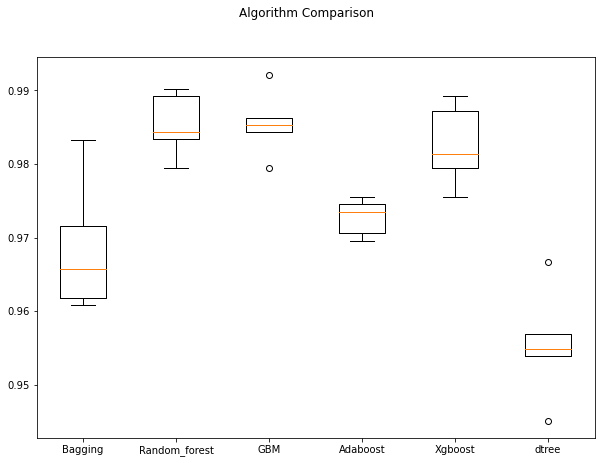

<IPython.core.display.Javascript object>

In [453]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

### Observation
1. The boxplot shows that the performance of Random forest is consistent with no outlier and while 2 one outlier for GBM.
2. The Performance of GBM and Random forest is highest on cross-validation.
3. Tuning - GBM and Random forest might improve its performance.

# 1.21 Model building - Oversampled data

### Oversampling train data using SMOTE

In [454]:
print(
    "Before Oversampling, counts of label 'Existing Customer': {}".format(
        sum(y_train == 1)
    )
)
print(
    "Before Oversampling, counts of label 'Attrited Customer': {} \n".format(
        sum(y_train == 0)
    )
)

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print(
    "After Oversampling, counts of label 'Existing Customer': {}".format(
        sum(y_train_over == 1)
    )
)
print(
    "After Oversampling, counts of label 'Attrited Customer': {} \n".format(
        sum(y_train_over == 0)
    )
)


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Existing Customer': 5099
Before Oversampling, counts of label 'Attrited Customer': 976 

After Oversampling, counts of label 'Existing Customer': 5099
After Oversampling, counts of label 'Attrited Customer': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



<IPython.core.display.Javascript object>

In [455]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging_with_oversampled_data", BaggingClassifier(random_state=1)))
models.append(
    ("Random_forest_with_oversampled_data", RandomForestClassifier(random_state=1))
)
models.append(("GBM_with_oversampled_data", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost_with_oversampled_data", AdaBoostClassifier(random_state=1)))
models.append(
    (
        "Xgboost_with_oversampled_data",
        XGBClassifier(random_state=1, eval_metric="logloss"),
    )
)
models.append(("dtree_with_oversampled_data", DecisionTreeClassifier(random_state=1)))

results_oversampling = []  # Empty list to store all model's CV scores
names_oversampling = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_oversampling.append(cv_result)
    names_oversampling.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging_with_oversampled_data: 93.58715772864592
Random_forest_with_oversampled_data: 96.45040312493987
GBM_with_oversampled_data: 96.21499355384941
Adaboost_with_oversampled_data: 94.46964536550637
Xgboost_with_oversampled_data: 97.43092997748658
dtree_with_oversampled_data: 93.09669225884662

Training Performance:

Bagging_with_oversampled_data: 99.37242596587566
Random_forest_with_oversampled_data: 100.0
GBM_with_oversampled_data: 97.01902333790939
Adaboost_with_oversampled_data: 94.94018434987252
Xgboost_with_oversampled_data: 100.0
dtree_with_oversampled_data: 100.0


<IPython.core.display.Javascript object>

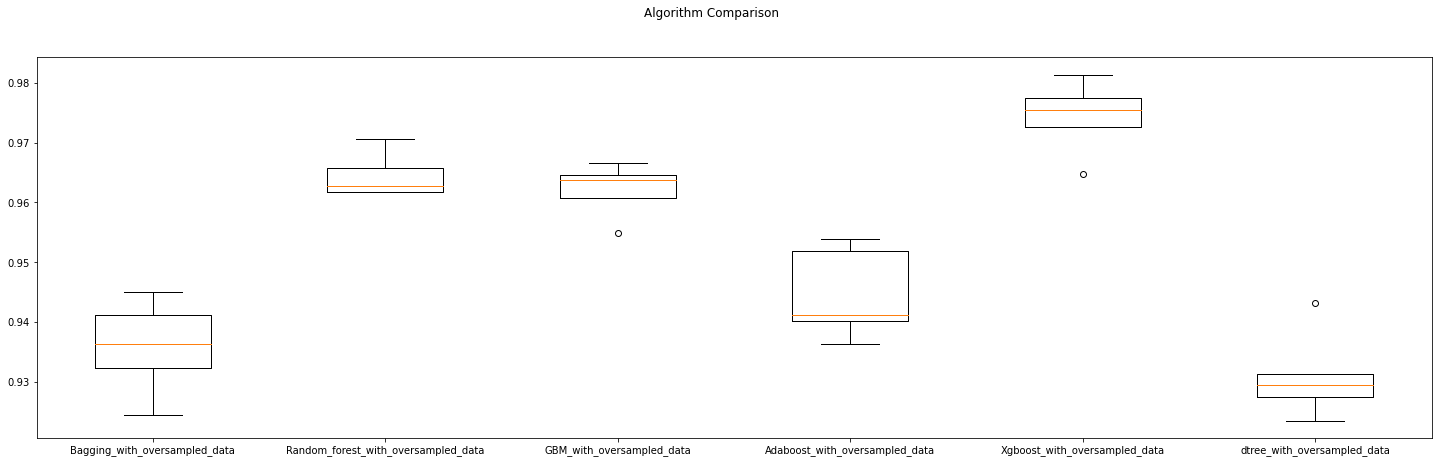

<IPython.core.display.Javascript object>

In [456]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(25, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_oversampling)
ax.set_xticklabels(names_oversampling)

plt.show()

### Observation
1. We can see that Xgboost_with_oversampled_data is giving the highest cross-validated recall followed by Random_Forest_with_oversampled_data.
2. The boxplot shows that the performance of Xgboost_with_oversampled_data has  1 outlier and while no outlier for Random_Forest_with_oversampled_data.
3. The Performance of Xgboost_with_oversampled_data and Random_Forest_with_oversampled_data is highest on cross-validation.
4. Tuning - Random_Forest_with_oversampled_data and Xgboost_with_oversampled_data might improve its performance.



# 1.22 Model building - Undersampled data

### Undersampling train data using Random Under Sampler

In [457]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [458]:
print(
    "Before Undersampling, counts of label 'Existing Customer': {}".format(
        sum(y_train == 1)
    )
)
print(
    "Before Undersampling, counts of label 'Attrited Customer': {} \n".format(
        sum(y_train == 0)
    )
)

print(
    "After Undersampling, counts of label 'Existing Customer': {}".format(
        sum(y_train_un == 1)
    )
)
print(
    "After Undersampling, counts of label 'Attrited Customer': {} \n".format(
        sum(y_train_un == 0)
    )
)

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Existing Customer': 5099
Before Undersampling, counts of label 'Attrited Customer': 976 

After Undersampling, counts of label 'Existing Customer': 976
After Undersampling, counts of label 'Attrited Customer': 976 

After Undersampling, the shape of train_X: (1952, 29)
After Undersampling, the shape of train_y: (1952,) 



<IPython.core.display.Javascript object>

In [459]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging_with_undersampled_data", BaggingClassifier(random_state=1)))
models.append(
    ("Random_forest_with_undersampled_data", RandomForestClassifier(random_state=1))
)
models.append(
    ("GBM_with_undersampled_data", GradientBoostingClassifier(random_state=1))
)
models.append(("Adaboost_with_undersampled_data", AdaBoostClassifier(random_state=1)))
models.append(
    (
        "Xgboost_with_undersampled_data",
        XGBClassifier(random_state=1, eval_metric="logloss"),
    )
)
models.append(("dtree_with_undersampled_data", DecisionTreeClassifier(random_state=1)))

results_undersampling = []  # Empty list to store all model's CV scores
names_undersampling = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")

for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results_undersampling.append(cv_result)
    names_undersampling.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Training Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un)) * 100
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging_with_undersampled_data: 89.03401360544217
Random_forest_with_undersampled_data: 90.47148090005231
GBM_with_undersampled_data: 92.93249607535321
Adaboost_with_undersampled_data: 89.55102040816327
Xgboost_with_undersampled_data: 92.82731554160127
dtree_with_undersampled_data: 88.93040293040293

Training Performance:

Bagging_with_undersampled_data: 99.18032786885246
Random_forest_with_undersampled_data: 100.0
GBM_with_undersampled_data: 96.51639344262296
Adaboost_with_undersampled_data: 91.18852459016394
Xgboost_with_undersampled_data: 100.0
dtree_with_undersampled_data: 100.0


<IPython.core.display.Javascript object>

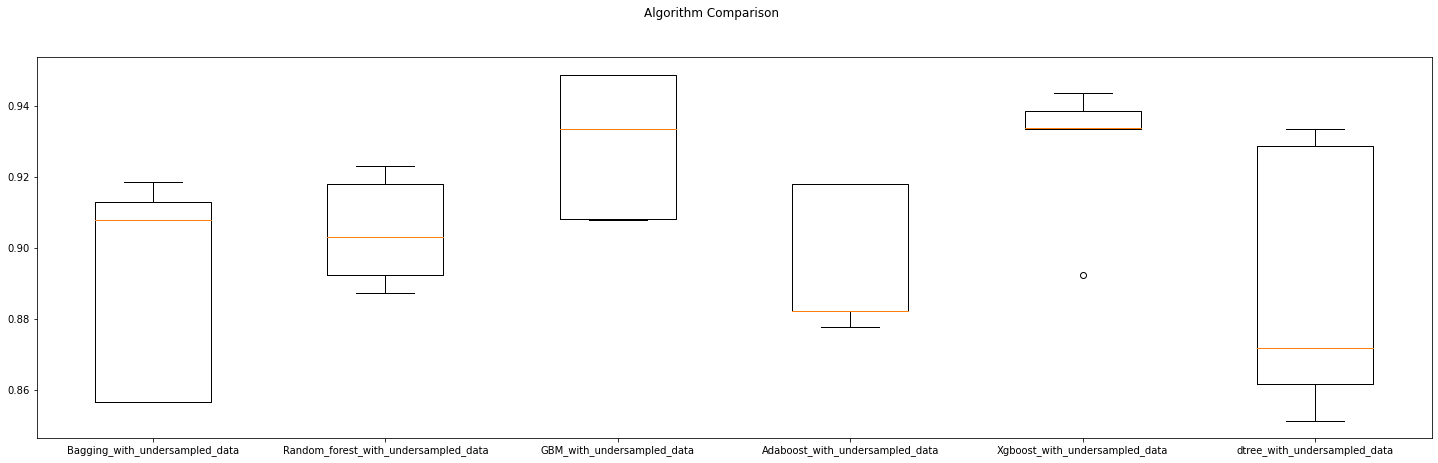

<IPython.core.display.Javascript object>

In [460]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(25, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results_undersampling)
ax.set_xticklabels(names_undersampling)

plt.show()

### Observation
1. We can see that GBM_with_undersampled_data is giving the highest cross-validated recall followed by Xgboost_with_undersampled_data.
2. The boxplot shows that the performance of Xgboost_with_undersampled_data has  one outlier and while no outlier for GBM_with_undersampled_data.
3. The Performance of GBM_with_undersampled_data is highest on cross-validation.
4. Tuning - GBM_with_undersampled_data and Xgboost_with_undersampled_data might improve its performance.



# 1.23 Hyperparameter tuning using random search

I have 
1. Built 6 models with original data.
2. 6 models with oversampled data.
3. Build 6 models with undersampled data.

4. For the original data, **Random forest and GBM** produced the highest recalls.  The **GBM produced the best recall** of 98.54 on cross validation. Hence, i will perform hyperparameter tuning on the **GBM model** using random search.

5.  For the oversampled data, **Random_Forest_with_oversampled_data and Xgboost_with_oversampled_data** produced the highest recalls.  The **Xgboost_with_oversampled_data** produced the best recall of 97.43 on cross validation. Hence, i will perform hyperparameter tuning on the **Xgboost_with_oversampled_data model** using random search.


6.  For the undersampled data, **GBM_with_undersampled_data and Xgboost_with_undersampled_data** produced the highest recalls.  The **GBM_with_undersampled_data** produced the best recall of 92.93 on cross validation. Hence, i will perform hyperparameter tuning on the **Xgboost_with_undersampled_data model** using random search.



### 3 MODELS TO TUNE.
1. GBM with original data.
2. Xgboost_with_oversampled_data.
3. GBM_with_undersampled_data.

In [461]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [462]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

###  Hyperparameter tuning of GBM with original data using random search

In [463]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, random_state=1, subsample=1)

<IPython.core.display.Javascript object>

In [490]:
# Calculating different metrics on train set
gbm_tune_train = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
print("Training performance:")
gbm_tune_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.909,0.992,0.909,0.948


<IPython.core.display.Javascript object>

In [492]:
# Calculating different metrics on validation set
gbm_tune_val = model_performance_classification_sklearn(gbc_tuned, X_val, y_val)
print("Validation performance:")
gbm_tune_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.893,0.991,0.893,0.940


<IPython.core.display.Javascript object>

In [493]:
# Calculating different metrics on test set
gbm_tune_test = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
print("test performance:")
gbm_tune_test

test performance:


,Accuracy,Recall,Precision,F1
0,0.900,0.995,0.898,0.944


<IPython.core.display.Javascript object>

###  Hyperparameter tuning of Xgboost_with_oversampled_data using random search

In [467]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,150,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(1,5,1),
            'reg_lambda':[5,10]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned2 = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned2.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(xgb_tuned2.best_params_,xgb_tuned2.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 1, 'learning_rate': 0.01, 'gamma': 1} with CV score=1.0:
Wall time: 1min 52s


<IPython.core.display.Javascript object>

In [497]:
# Calculating different metrics on train set
xgb_tune_over_train = model_performance_classification_sklearn(
    xgb_tuned2, X_train_over, y_train_over
)
print("Training performance:")
xgb_tune_over_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.562,1.000,0.533,0.696


<IPython.core.display.Javascript object>

In [498]:
# Calculating different metrics on validation set
xgb_tune_over_val = model_performance_classification_sklearn(xgb_tuned2, X_val, y_val)
print("Validation performance:")
xgb_tune_over_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.852,0.999,0.851,0.919


<IPython.core.display.Javascript object>

In [500]:
# Calculating different metrics on test set
xgb_tune_over_test = model_performance_classification_sklearn(
    xgb_tuned2, X_test, y_test
)
print("Test performance:")
xgb_tune_over_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.855,0.999,0.853,0.920


<IPython.core.display.Javascript object>

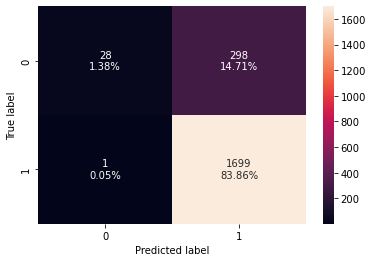

<IPython.core.display.Javascript object>

In [474]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_val, y_val)

- The validation recall has increased by ~54% as compared to the result from cross-validation with default parameters.
- The model has very low precision score (however low precision shouldn't affect us much here)

###  Hyperparameter tuning of GBM_with_undersampled_data using random search

In [475]:
# Choose the type of classifier.
gbc_tuned_un = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the clf to the best combination of parameters
gbc_tuned_un = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=0.8)

<IPython.core.display.Javascript object>

In [502]:
# Calculating different metrics on train set
gbm_tune_train_un = model_performance_classification_sklearn(
    gbc_tuned_un, X_train_un, y_train_un
)
print("Training performance:")
gbm_tune_train_un

Training performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.986,0.991,0.988


<IPython.core.display.Javascript object>

In [504]:
# Calculating different metrics on validation set
gbm_tune_val_un = model_performance_classification_sklearn(gbc_tuned_un, X_val, y_val)
print("Validation performance:")
gbm_tune_val_un

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.939,0.944,0.983,0.963


<IPython.core.display.Javascript object>

In [505]:
# Calculating different metrics on validation set
gbm_tune_test_un = model_performance_classification_sklearn(
    gbc_tuned_un, X_test, y_test
)
print("Test performance:")
gbm_tune_test_un

Test performance:


,Accuracy,Recall,Precision,F1
0,0.941,0.945,0.983,0.964


<IPython.core.display.Javascript object>

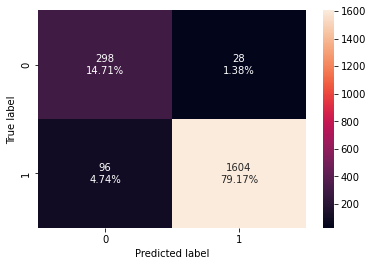

<IPython.core.display.Javascript object>

In [482]:
# creating confusion matrix
confusion_matrix_sklearn(gbc_tuned_un, X_val, y_val)

# Comparing all model

In [508]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_tune_train.T,
        xgb_tune_over_train.T,
        gbm_tune_train_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GBM Tuned with RandomSearch",
    "Xgb_Over_Sampled Tuned with Random search",
    "GBM _Under_Sampled Tuned with RandomSearch",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,GBM Tuned with RandomSearch,Xgb_Over_Sampled Tuned with Random search,GBM _Under_Sampled Tuned with RandomSearch
Accuracy,0.909,0.562,0.988
Recall,0.992,1.000,0.986
Precision,0.909,0.533,0.991
F1,0.948,0.696,0.988


<IPython.core.display.Javascript object>

In [509]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_tune_val.T,
        xgb_tune_over_val.T,
        gbm_tune_val_un.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GBM Tuned with RandomSearch",
    "Xgb_Over_Sampled Tuned with Random search",
    "GBM _Under_Sampled Tuned with RandomSearch",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,GBM Tuned with RandomSearch,Xgb_Over_Sampled Tuned with Random search,GBM _Under_Sampled Tuned with RandomSearch
Accuracy,0.893,0.852,0.939
Recall,0.991,0.999,0.944
Precision,0.893,0.851,0.983
F1,0.940,0.919,0.963


<IPython.core.display.Javascript object>

1. The **xgboost_Over_Sampled model tuned using Random** search is giving the best validation recall of 0.999. 
2. **GBM _Under_Sampled Tuned with RandomSearch** has the high values of train and validation precision and accuracy.
- Now, i want to check the model's performance on test set and then see the feature importance from the tuned xgboost_Over_Sampled model.

#### Performance on the test set

In [510]:
# Calculating different metrics on the test set
Xgboost_Over_Sampled_Tuned_Random_search = model_performance_classification_sklearn(
    xgb_tuned2, X_test, y_test
)
print("Test performance:")
Xgboost_Over_Sampled_Tuned_Random_search

Test performance:


,Accuracy,Recall,Precision,F1
0,0.855,0.999,0.853,0.920


<IPython.core.display.Javascript object>

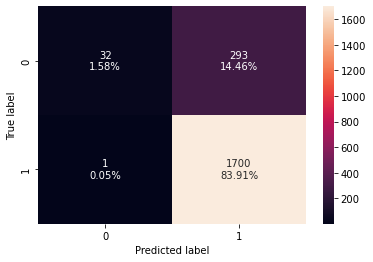

<IPython.core.display.Javascript object>

In [511]:
# creating confusion matrix
confusion_matrix_sklearn(xgb_tuned2, X_test, y_test)

- Model trained with oversampled data has given generalised performance on the test set

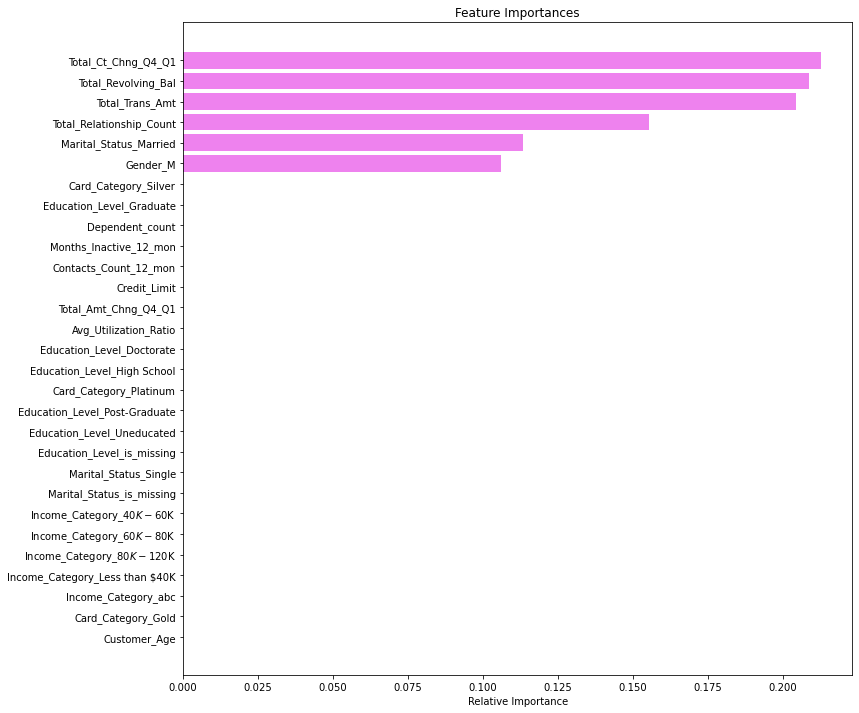

<IPython.core.display.Javascript object>

In [512]:
feature_names = X_train.columns
importances = xgb_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

1. I have used **xgboost over sampled** model to demonstrate the calculation of the feature importance.
2. **Total_Ct_Chng_Q4_Q1** is the most important feature, followed by **Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count, Marital_Status_Married and Gender_M** as per the tuned xgboost oversampled model.

# Productionize the model

- Now, I have a final model. let's use pipelines to put the model into production



## Column Transformer
- We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable - 

- Column transformer allows different columns or column subsets of the input to be transformed separately and the features generated by each transformer will be concatenated to form a single feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms or transformations into a single transformer.

- I will create 2 different pipelines, one for numerical columns and one for categorical columns
- For numerical columns, we will do missing value imputation as pre-processing
- For categorical columns, we will do one hot encoding and missing value imputation as pre-processing

- We are doing missing value imputation for the whole data, so that if there is any missing value in the data in future that can be taken care of.

In [513]:
# creating a list of numerical variables
numerical_features = [
    "Total_Amt_Chng_Q4_Q1",
    "Total_Revolving_Bal",
    "Total_Trans_Amt",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Total_Ct_Chng_Q4_Q1",
    "Avg_Utilization_Ratio",
    "Customer_Age",
]

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ["Education_Level", "Marital_Status", "Card_Category", "Credit_Limit", "Income_Category", "Dependent_count" ]

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="passthrough",
)
# remainder = "passthrough" has been used, it will allow variables that are present in original data 
# but not in "numerical_columns" and "categorical_columns" to pass through the column transformer without any changes


<IPython.core.display.Javascript object>

In [514]:
# Separating target variable and other variables
X = data1.drop(columns="Attrition_Flag")
Y = data1["Attrition_Flag"]

<IPython.core.display.Javascript object>

In [515]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 16) (3039, 16)


<IPython.core.display.Javascript object>

In [516]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=50,
                scale_pos_weight=10,
                subsample=1,
                learning_rate=0.05,
                gamma=0,
                eval_metric="logloss",
                reg_lambda=10,
                max_depth=1,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Total_Amt_Chng_Q4_Q1',
                                                   'Total_Revolving_Bal',
                                                   'Total_Trans_Amt',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio',
                                                   'Customer_Age']...
      

<IPython.core.display.Javascript object>

In [517]:
# transforming and predicting on test data
model.predict(X_test)

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

<IPython.core.display.Javascript object>

## Business Recommendations & Actionable Insights


1. The majority of the existing customers have less education. As the **[Education_Level],** of the customer increases, the customers becomes more likely to be **attrited**. We saw earlier that customers with a Doctorate degree are more likely to leave credit cards services than customers with lesser education. Hence, Thera bank should target the customers by performing 2 tasks:

- Try to grow its existing customer base i.e by reaching out to people with fewer education level.
- Try to find out the reason why highly educated customers are **attrited**. It is possible that these group of customers are aware of the implications of using this service, such as late payment penalty or negative impact on the customers credit score. Thera bank should reduce its penalty for defaulters. This might attract the highly educated customers. 

2. - In my analysis, i observed that  46.3% of the customers are married, while  7.4% of the customers are divorced. Majority of the existing customers are **married or divorced**. The company should expand its customer base by customizing offers to attract more single customers.

3. Majority of the existing customers **earn below 80k annually**. They maybe classified as low income earners.  **60k-80k income customers** are more likely to use credit cards services than  **120k+ income customer**. Thera bank should expand its customer base by customizing offers to attract high income earners. These offers should have lesser fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others.

4. 52.9% of the customers are Female. Majority of the **attrited customers** also Female while majority of the **existing customers** are MALE. Thera bank should focus on attracting more Male customers as they are the major users of the credit card.  Thera bank can expand their customer base by customizing offers to attract the Female gender. 

5. Majority of the existing customers use **Silver** cards. Customers that use **Silver cards** are more likely to use credit cards services than Customers that use **Platinum cards**. Thera bank should focus on adding more features to the other card_category, similar to the **Silver** cards or better than the **Silver** cards. This will increase the users of the cards.

6. Customers with **higher number of products held** are more likely to use credit cards services than other customers with **lesser number of products held**. Thera bank should focus on increasing the product features. This will increase the  **number of products held**. Hence, more profit for the bank.

7. My Pipeline shows that **Total_Ct_Chng_Q4_Q1** is the most important feature, followed by **Total_Revolving_Bal, Total_Trans_Amt, Total_Relationship_Count** in the classifiction model.

8. Customers with more contacts with bank in the last 12 months are more likely to be **attrited**. Customers with zero contacts with bank in the last 12 months are the **existing customers**. This might be a clear indication of poor customer service at the bank's branch. The bank should consider reviewing the performance of those in charge of customer care.


